Hyperbolic PDE
===
One-way wave equation:
$$ u_t + c u_x = 0$$
$$ u(0,x) = f(x) \quad \text{on} \, [0,1] $$
<center>
(Periodic boundary conditions)
</center>

Solution
===
$$ u(t,x) = f(x-ct) $$

Step 1: Import packages
===
- `numpy` is used for vectors and linear algebra
- `scipy` is unused here, but is common for scientific computing applications
- `matpllotlib.pyplot` is used for plotting

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Step 2: Set up grid
===
dx: grid spacing in the $x$-direction  
x: grid coordinates  
xx: really fine grid coordinates

In [2]:
nx = 100
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]

Step 3: Set time/speed parameters
===

In [3]:
c = 1.0 # speed
T = 1.0 / c # end time
lmbda = 0.93
dt = dx * lmbda / c
nt = int(T/dt)
print('T = %g' % T)
print('tsteps = %d' % nt)
print('    dx = %g' % dx)
print('    dt = %g' % dt)
print('lambda = %g' % lmbda)

T = 1
tsteps = 107
    dx = 0.01
    dt = 0.0093
lambda = 0.93


Step 4: Set initial condition
===
Square wave with amplitude 1

In [4]:
def f(x):
    return [1 if xi>0.4 and xi<0.6 else 0 for xi in x]

Step 5: Plot solution
===


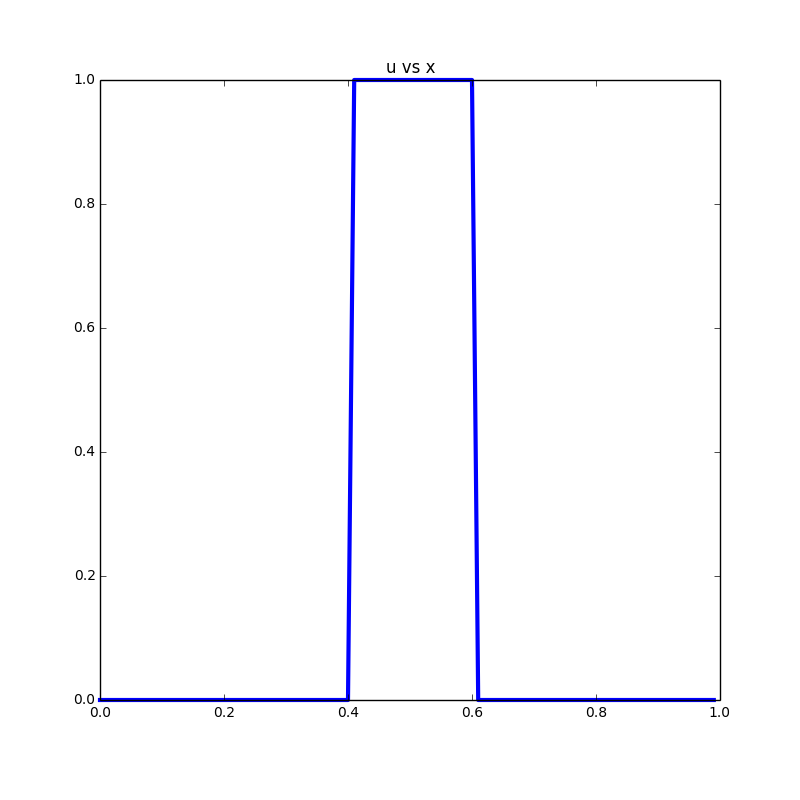
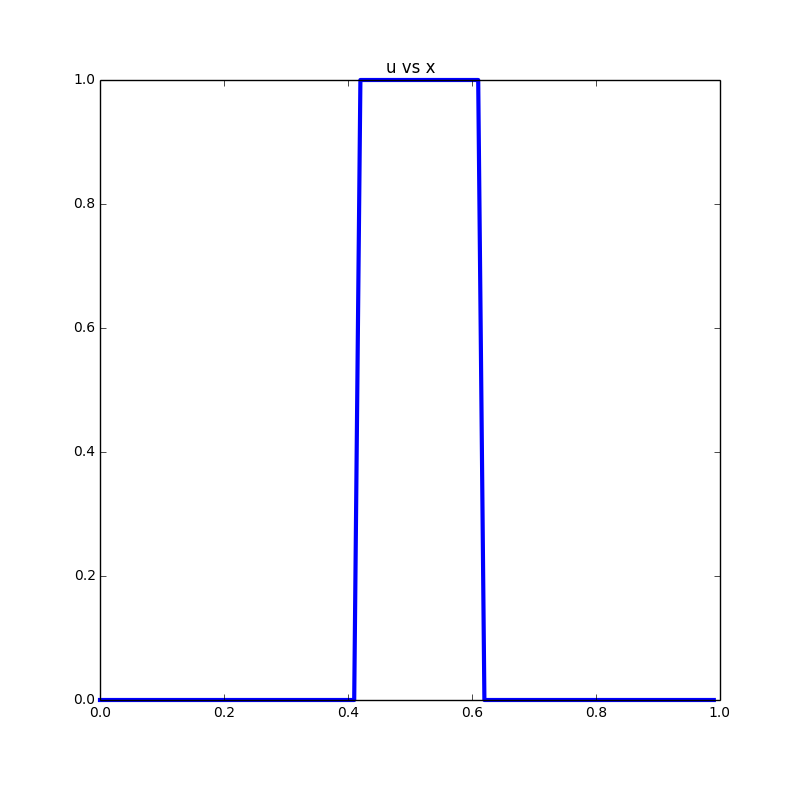
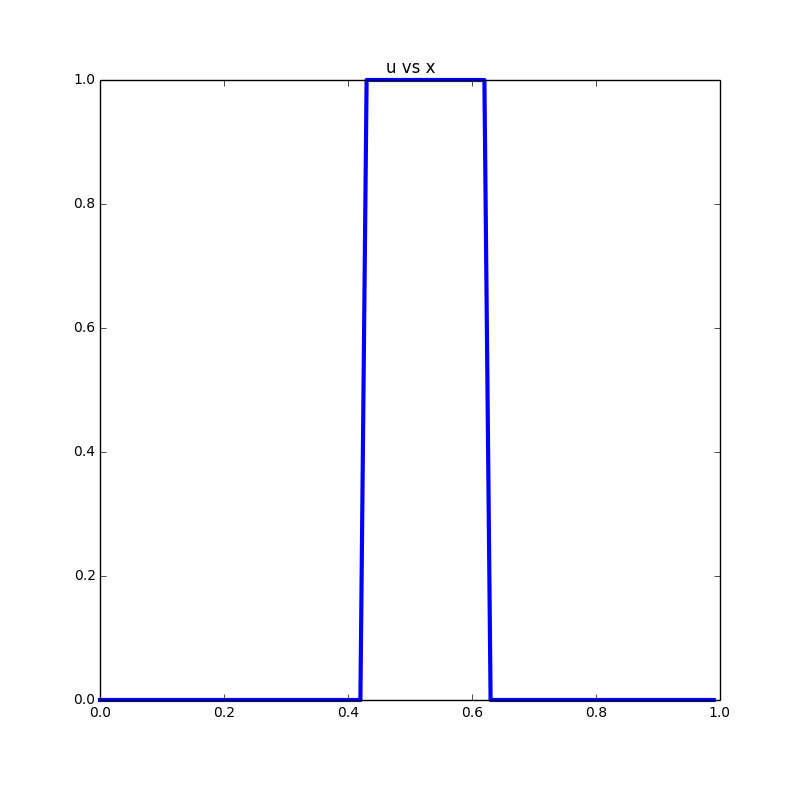
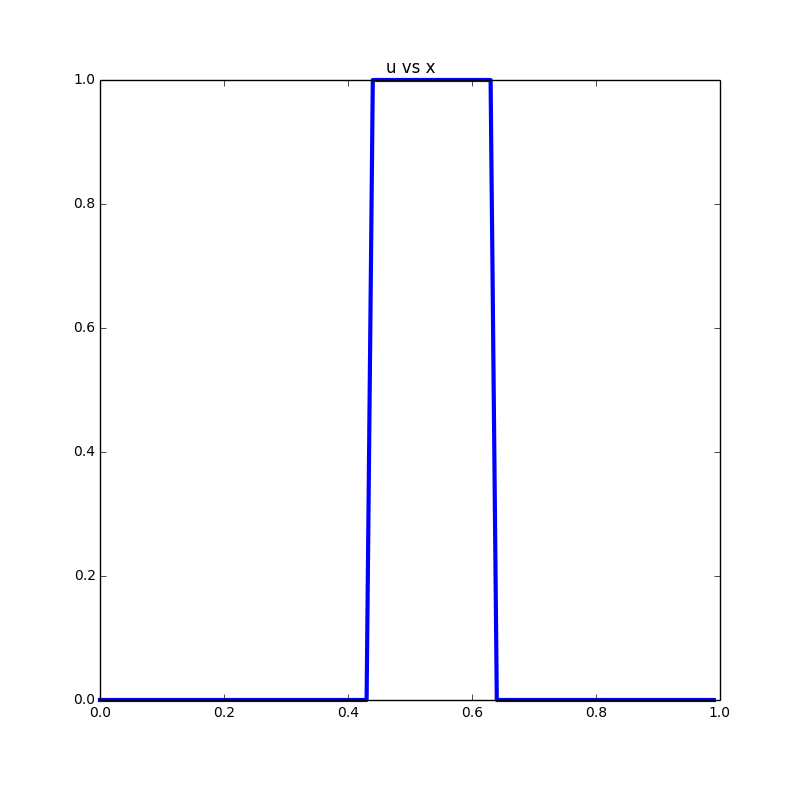
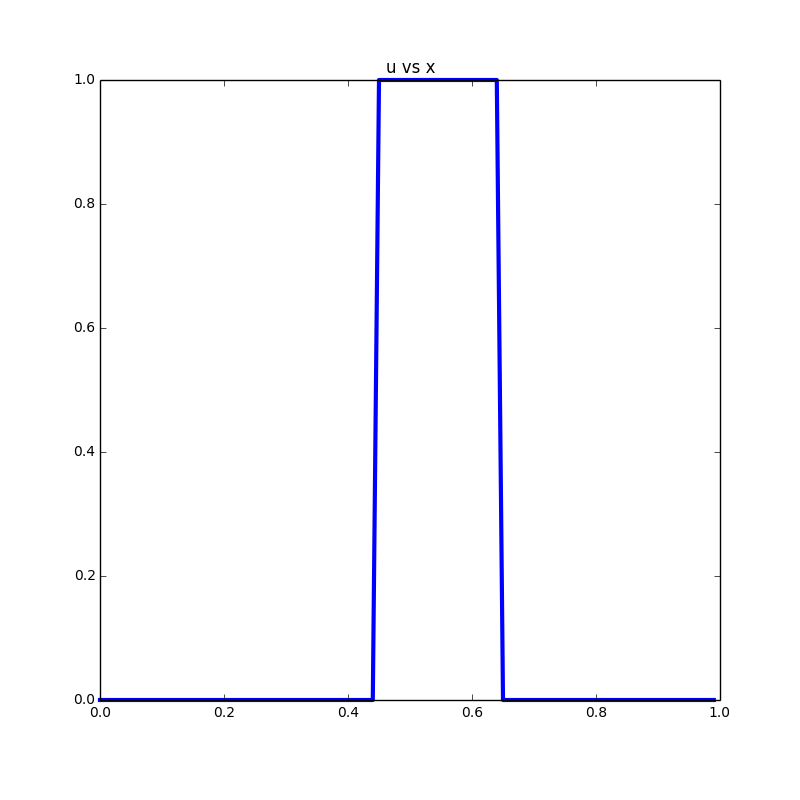
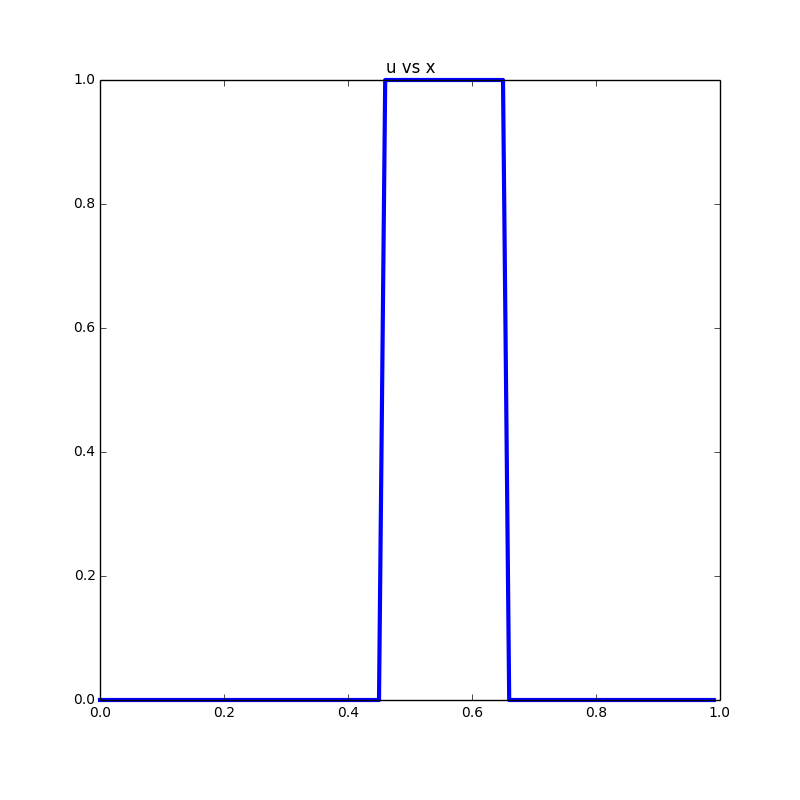
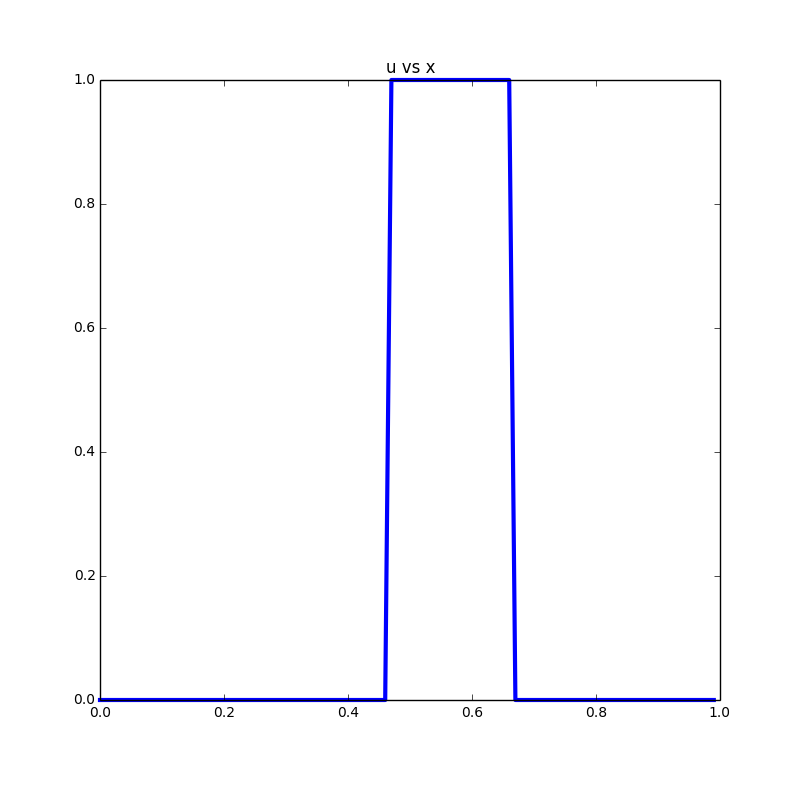
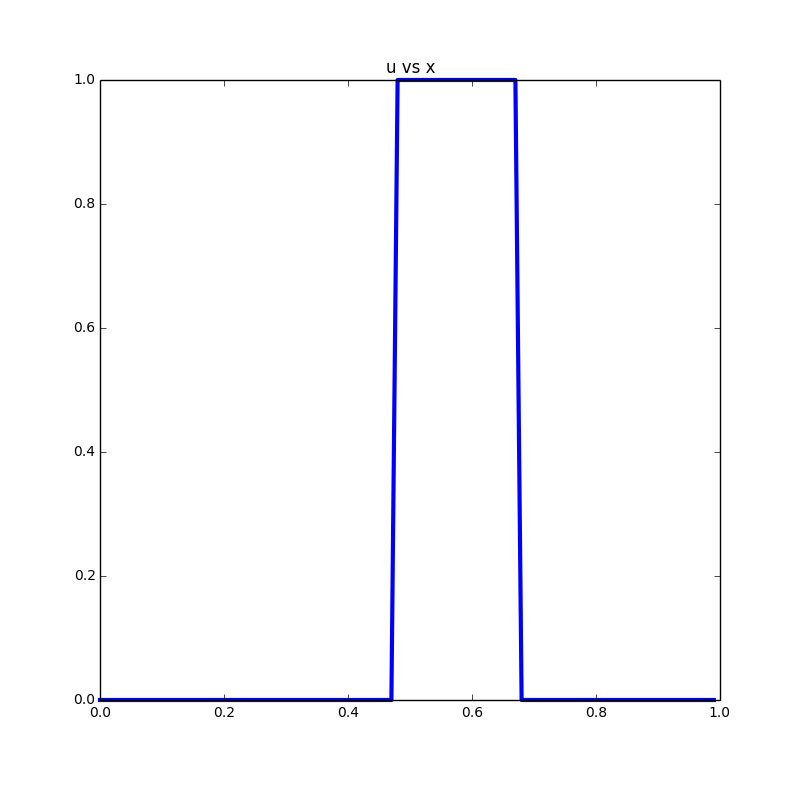
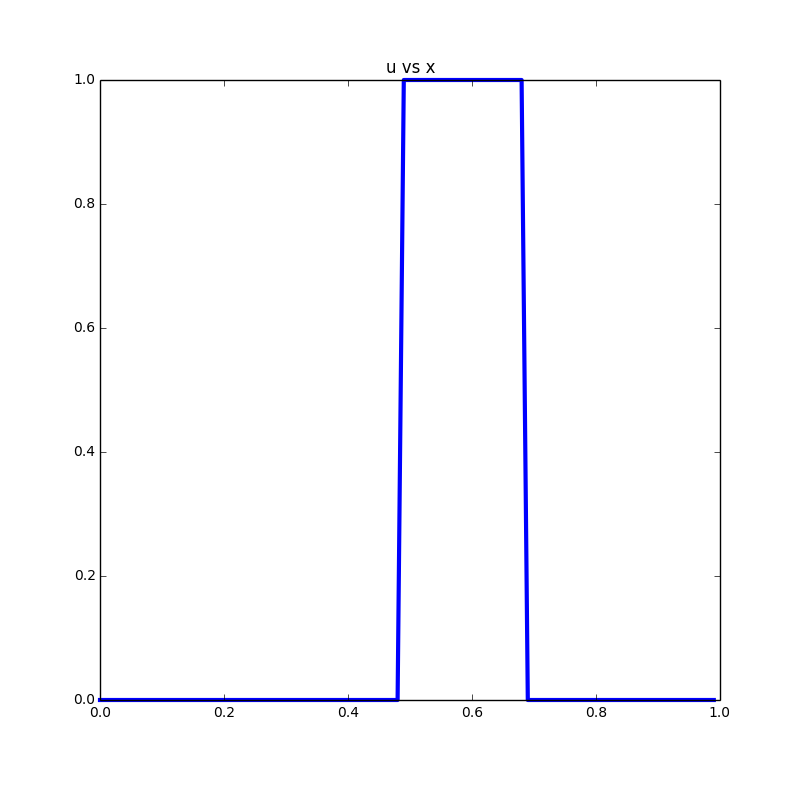
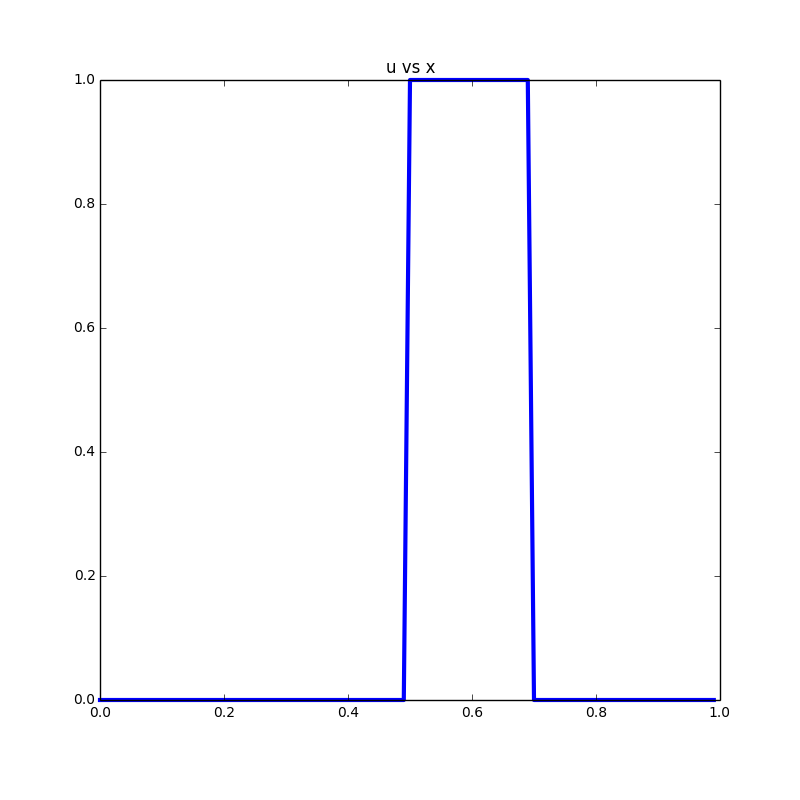
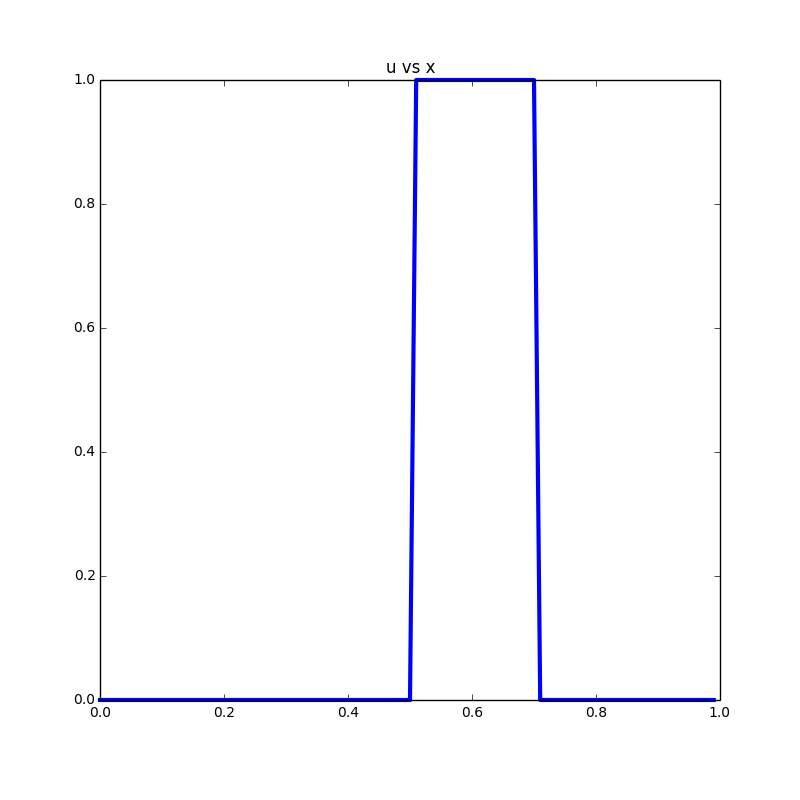
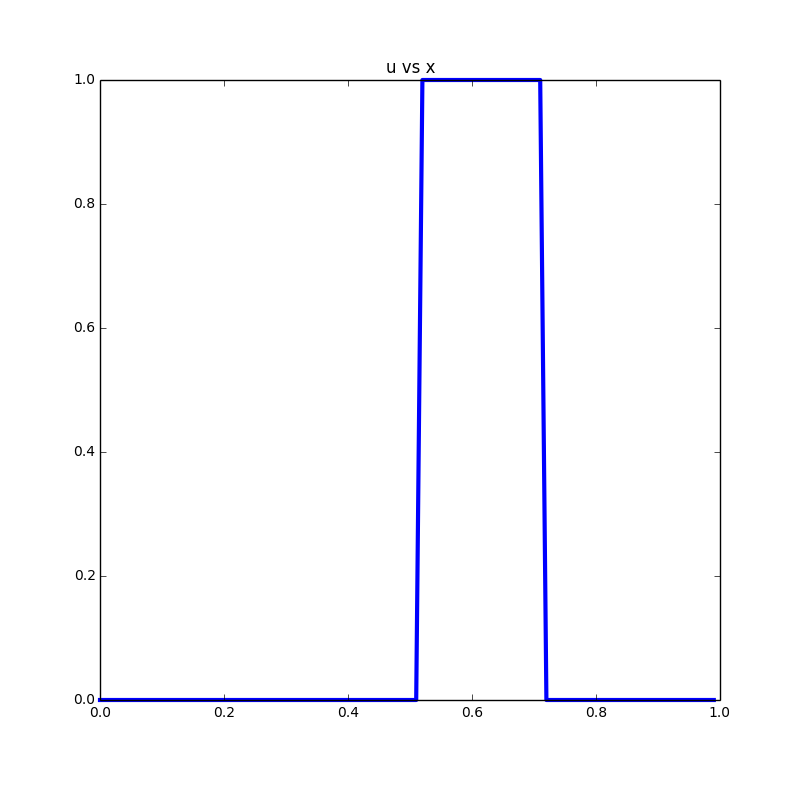
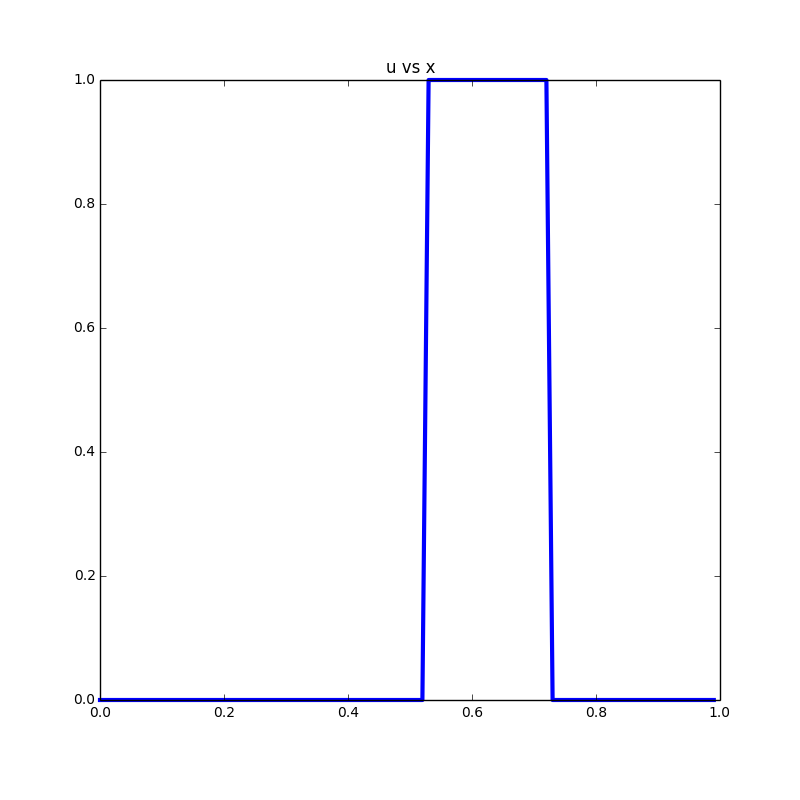
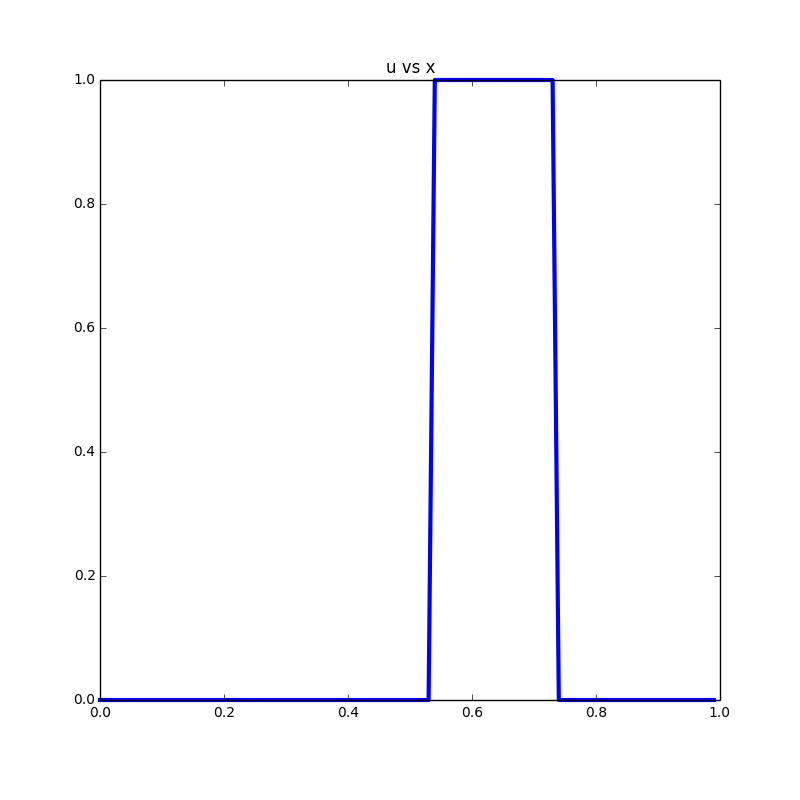
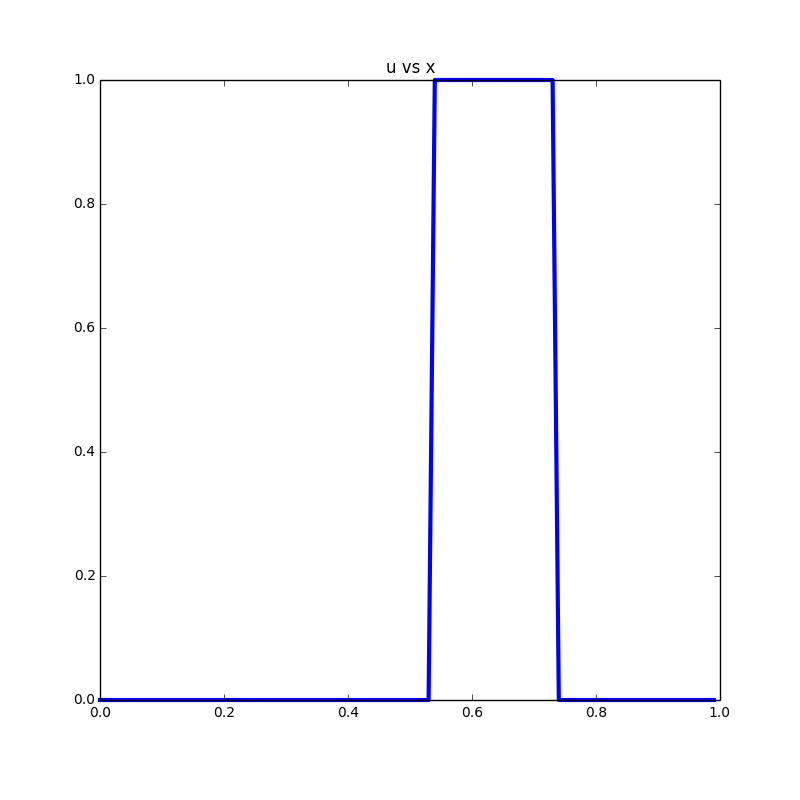
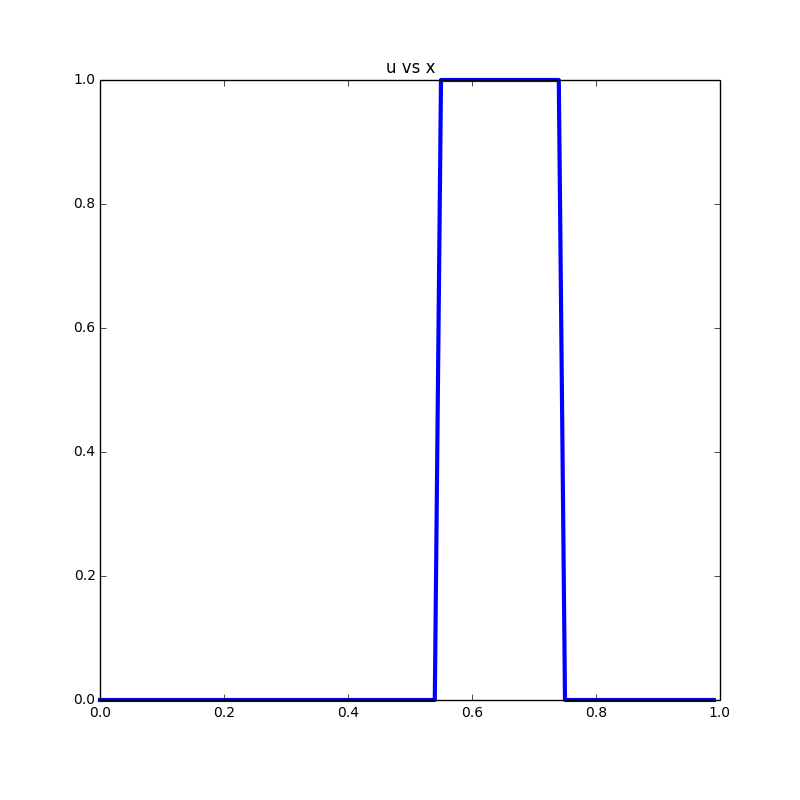
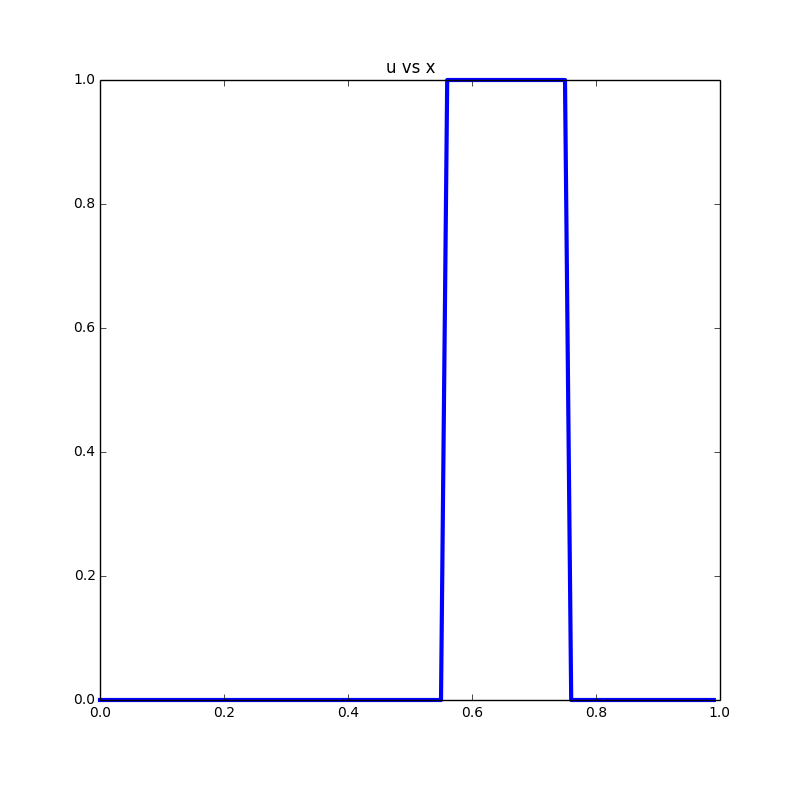
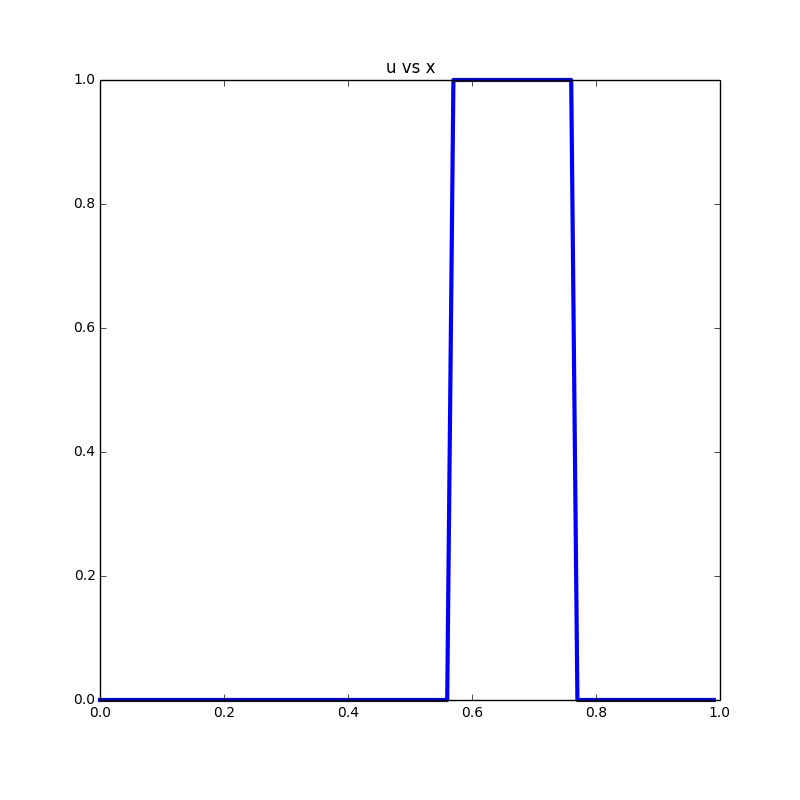
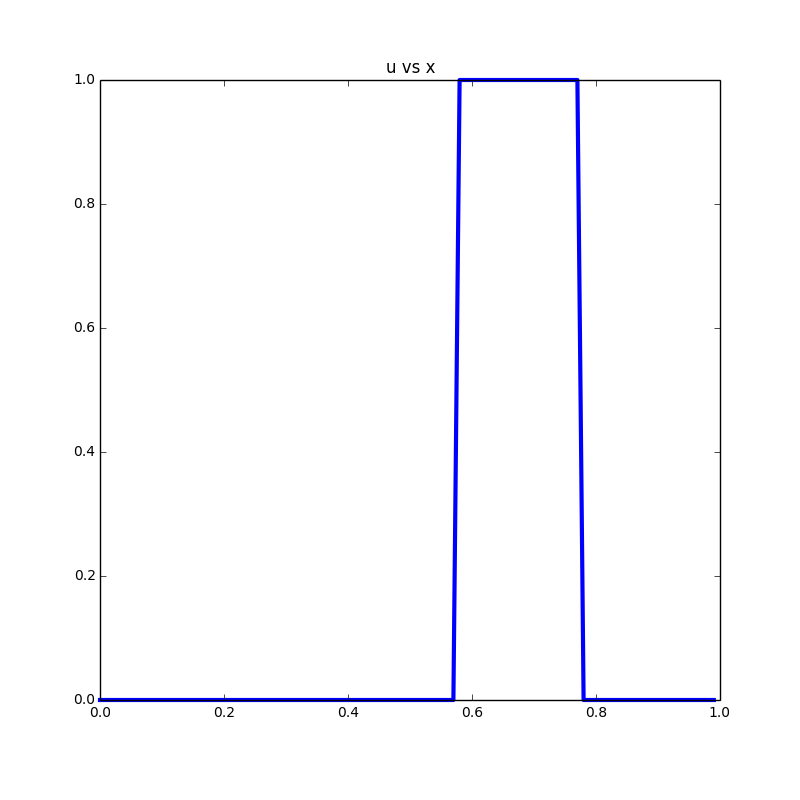
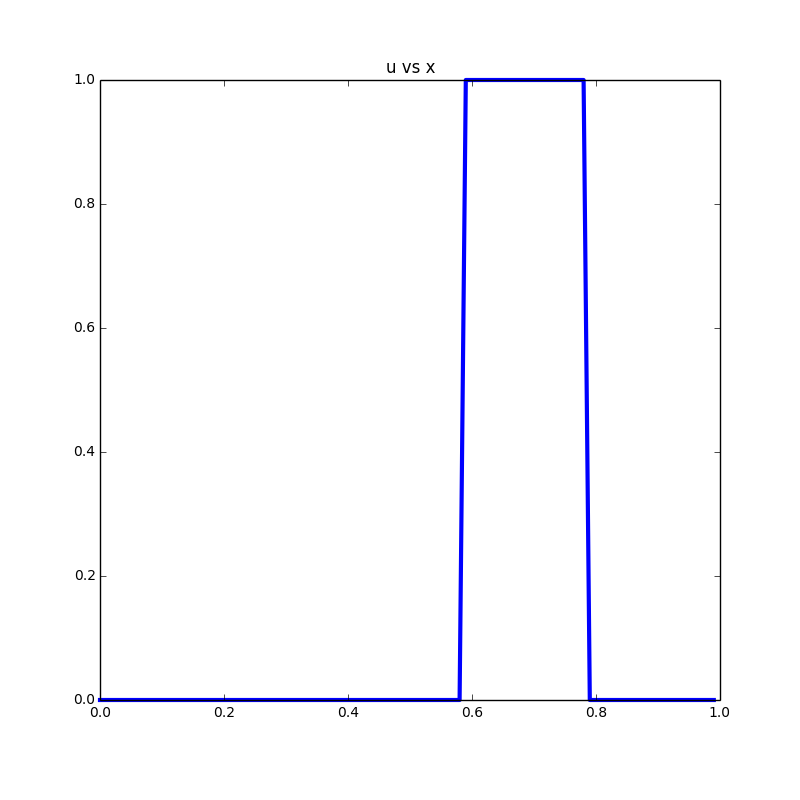
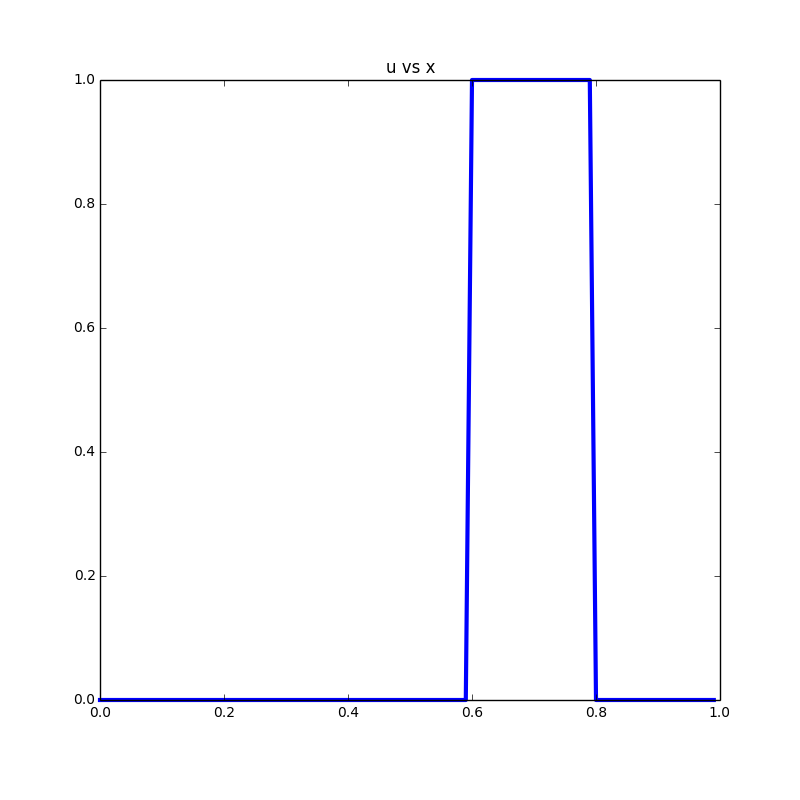
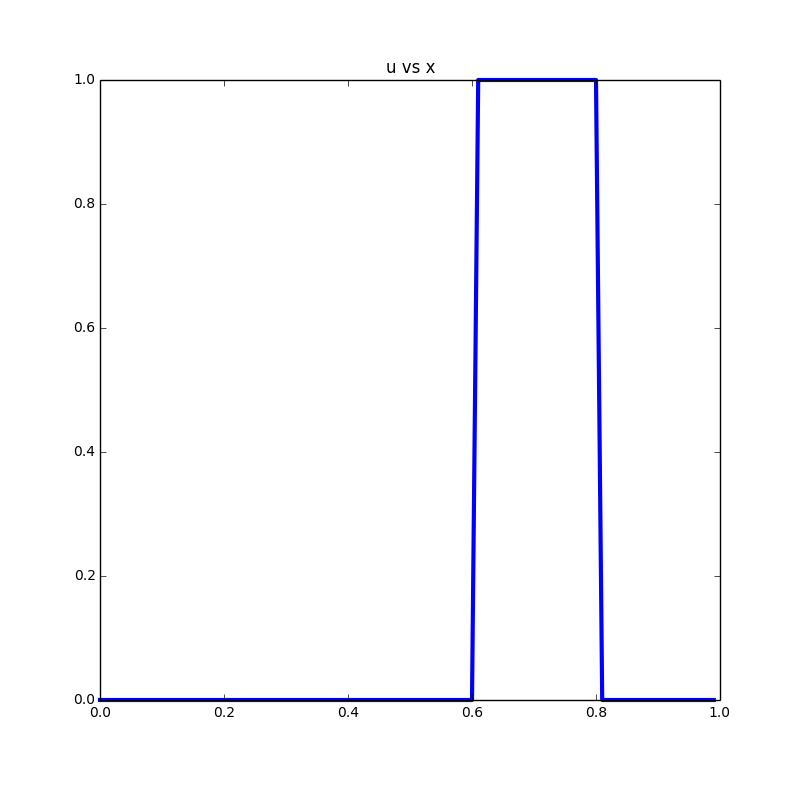
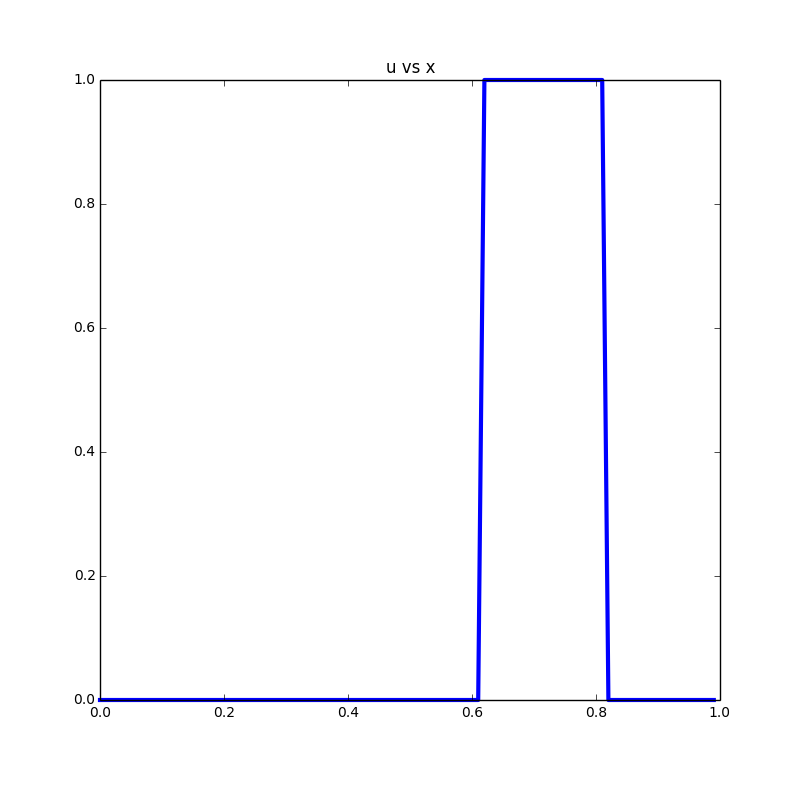
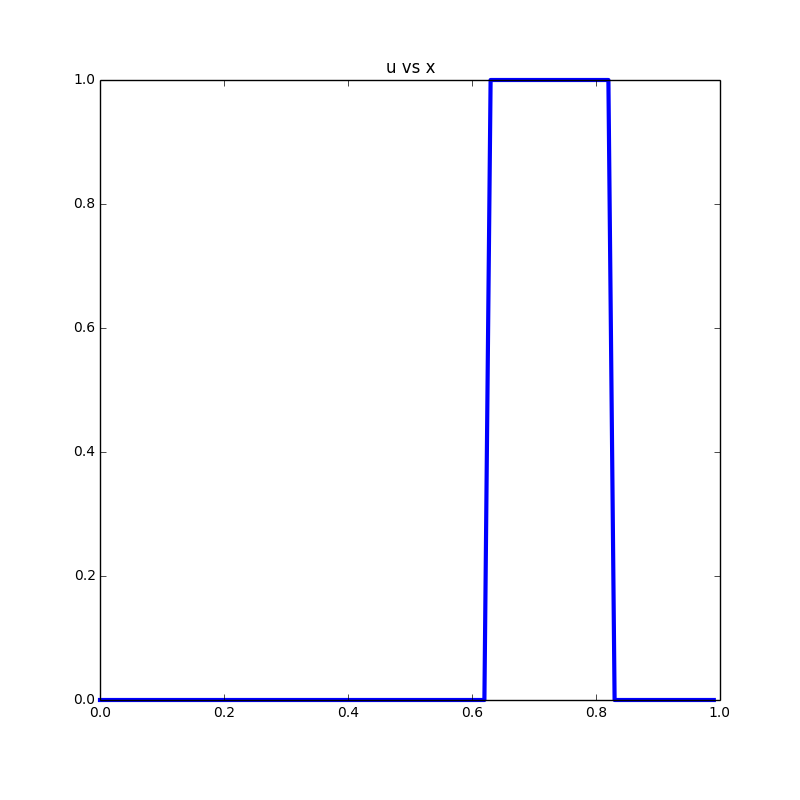
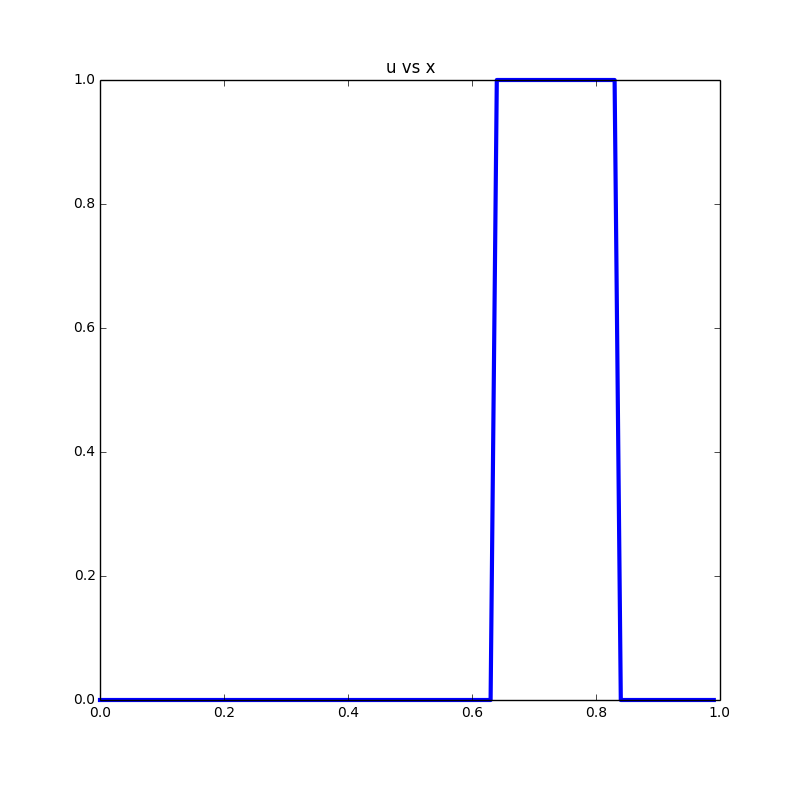
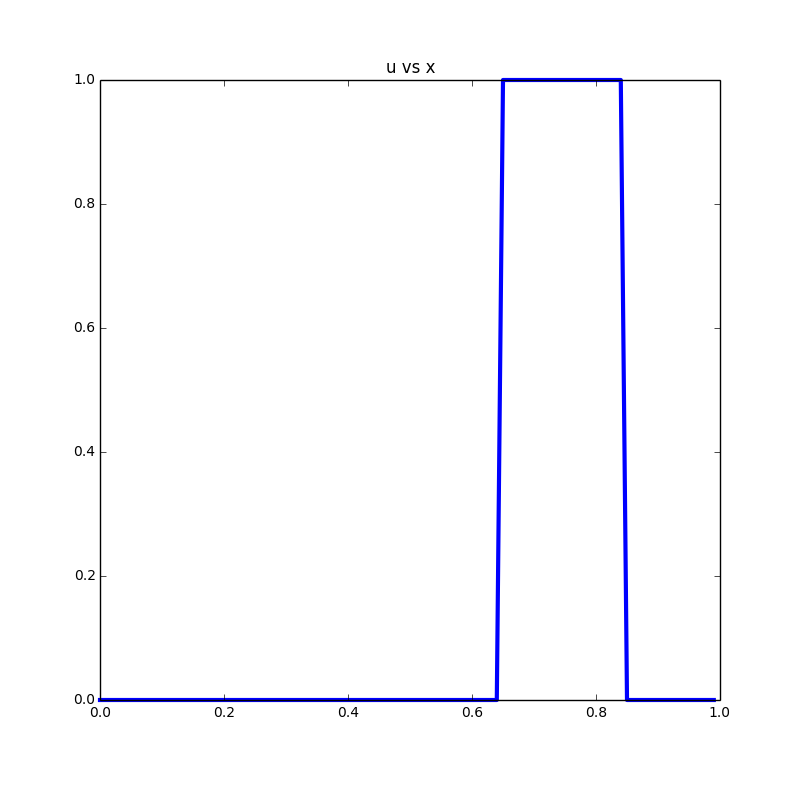
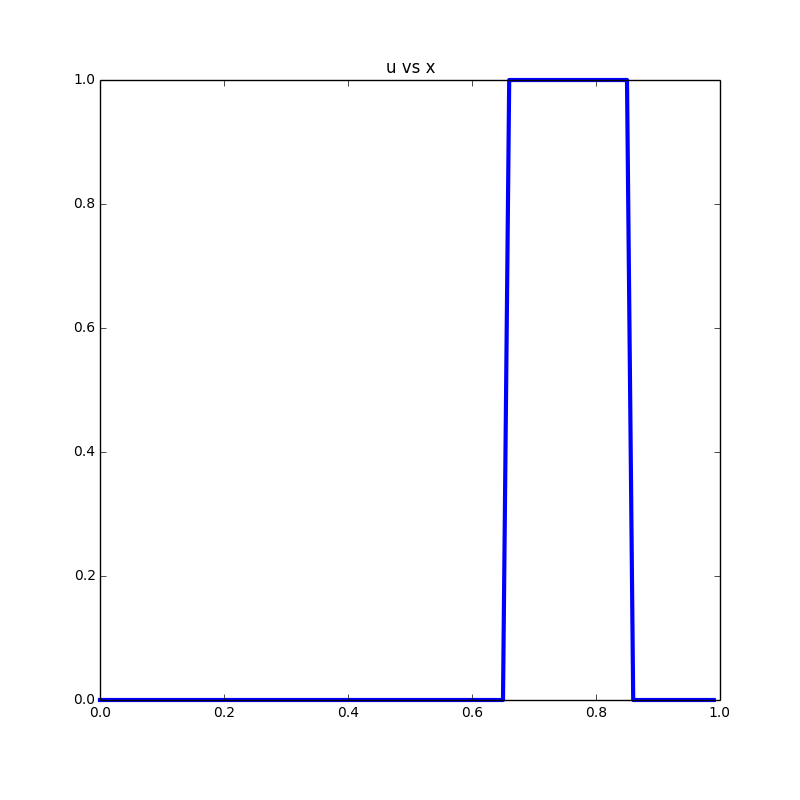
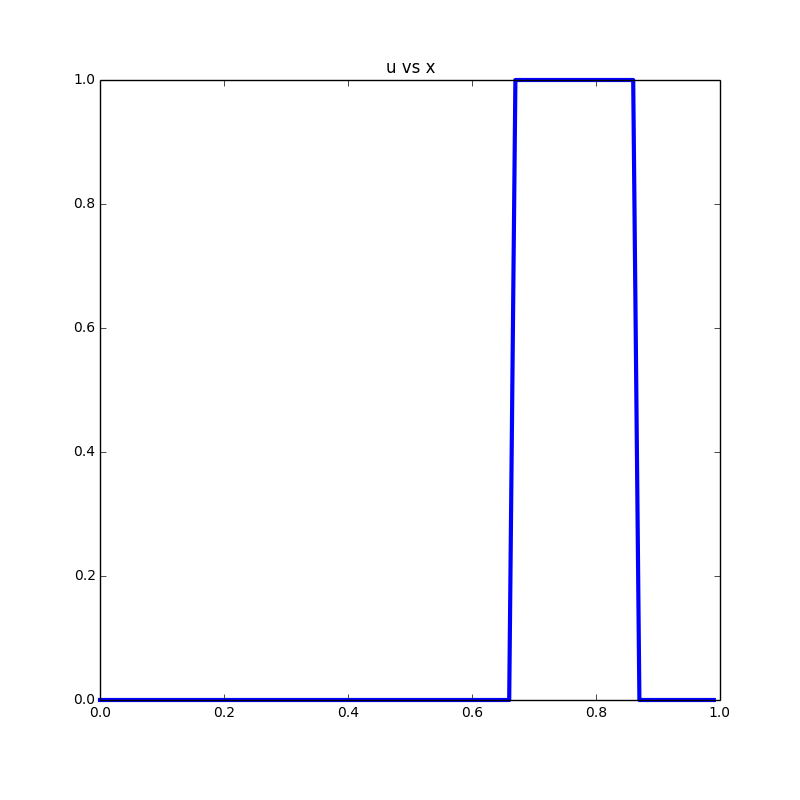
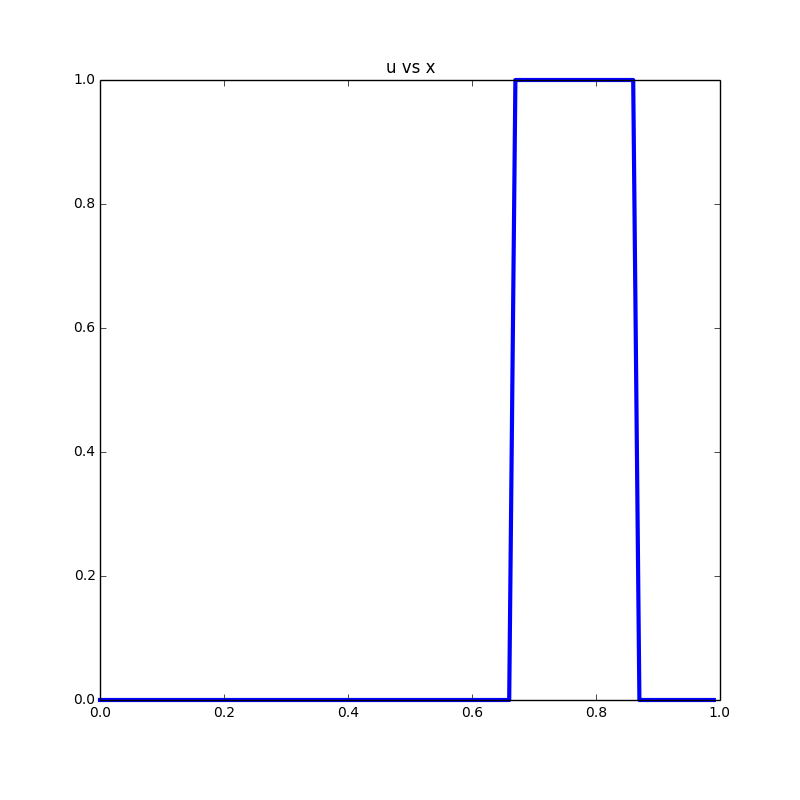
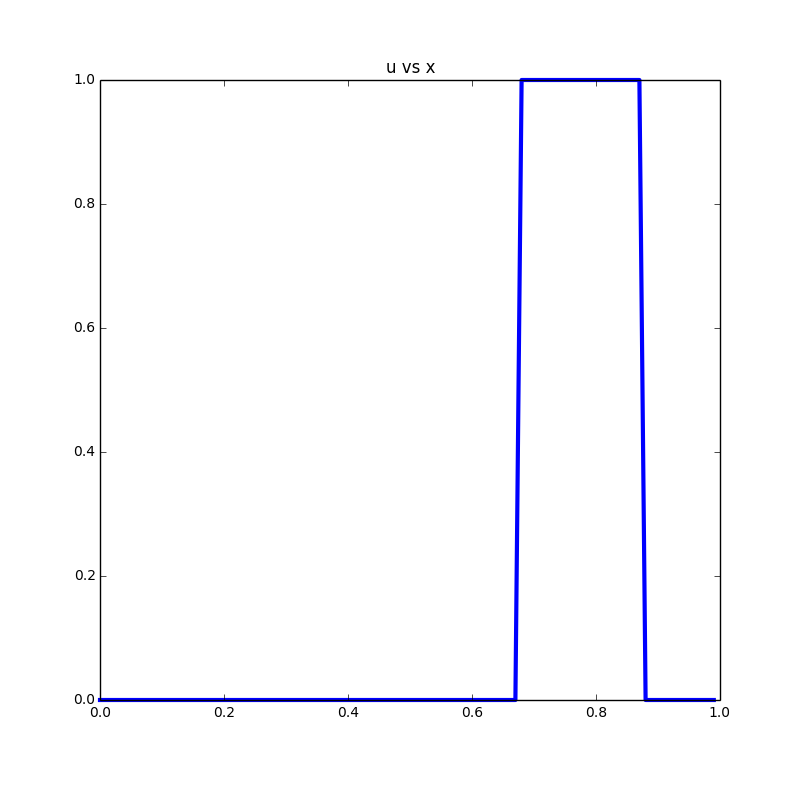
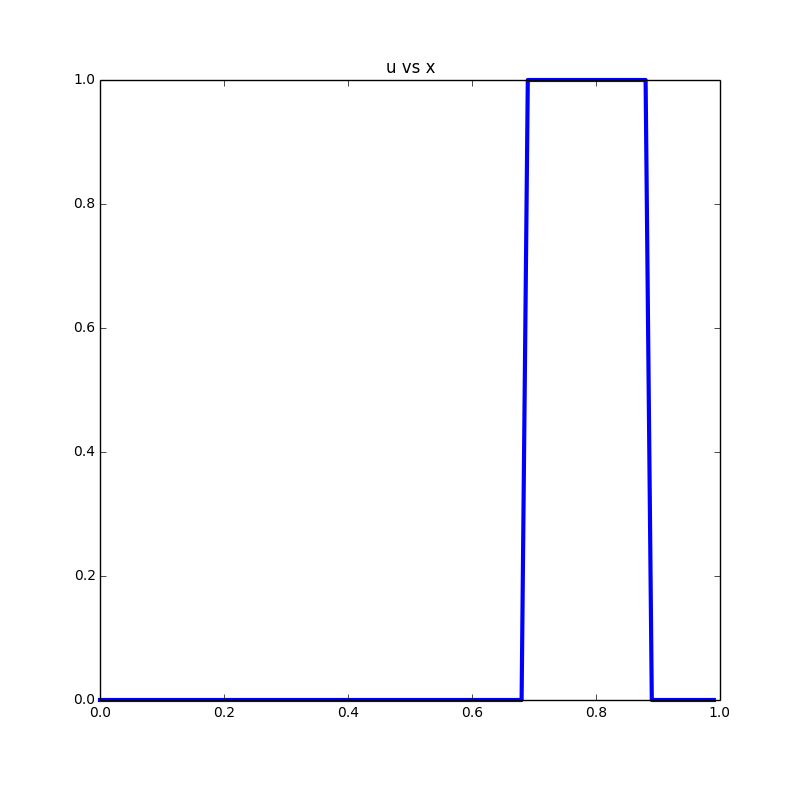
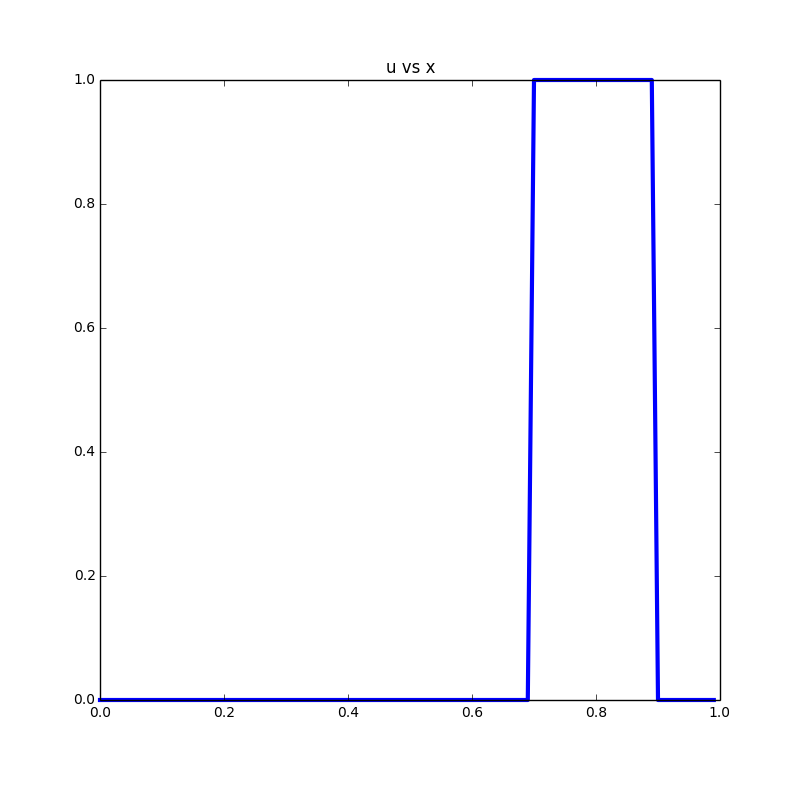
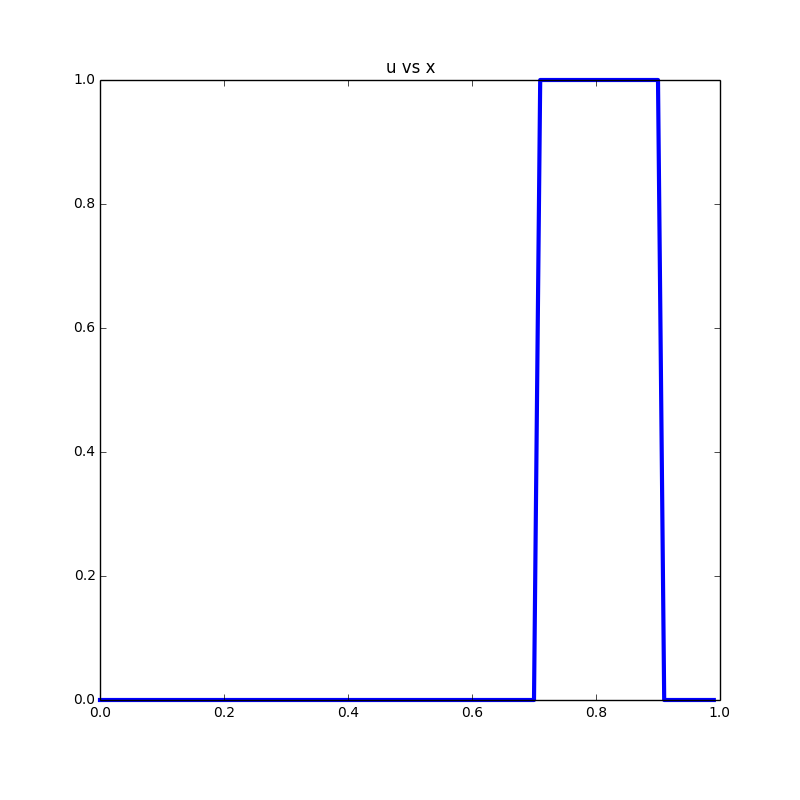
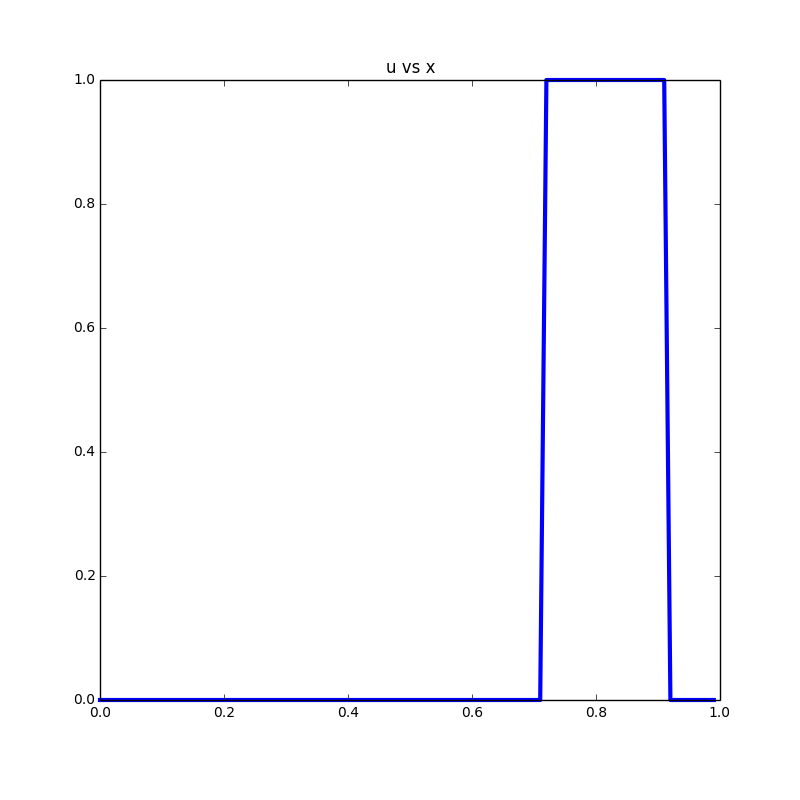
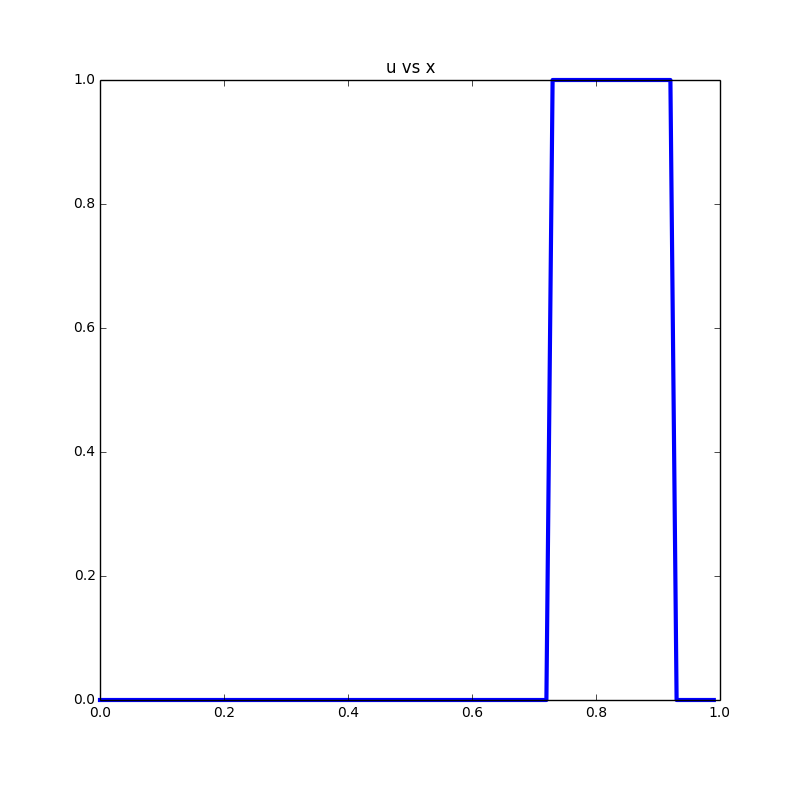
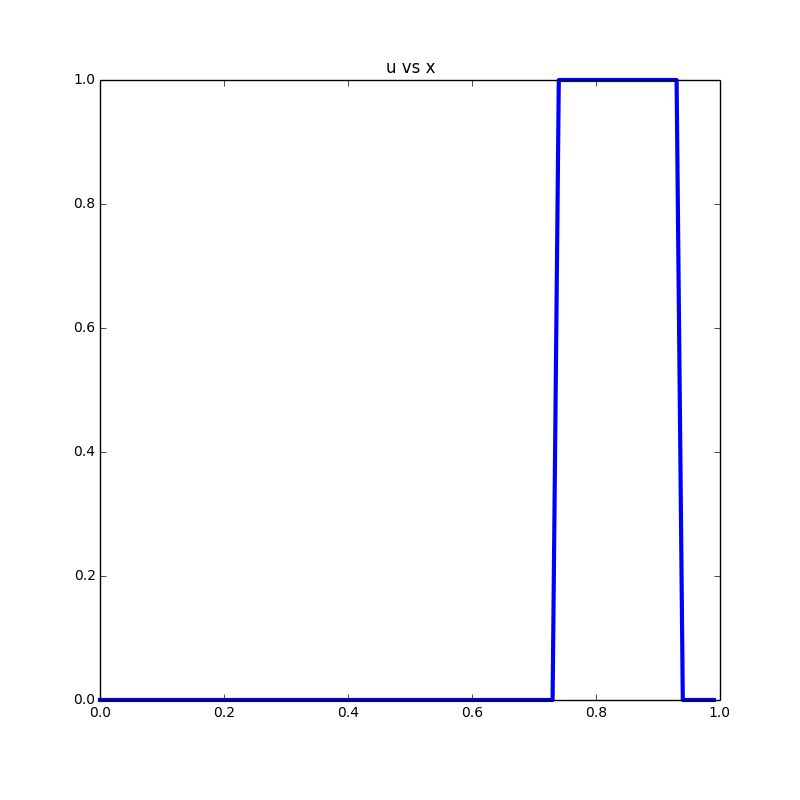
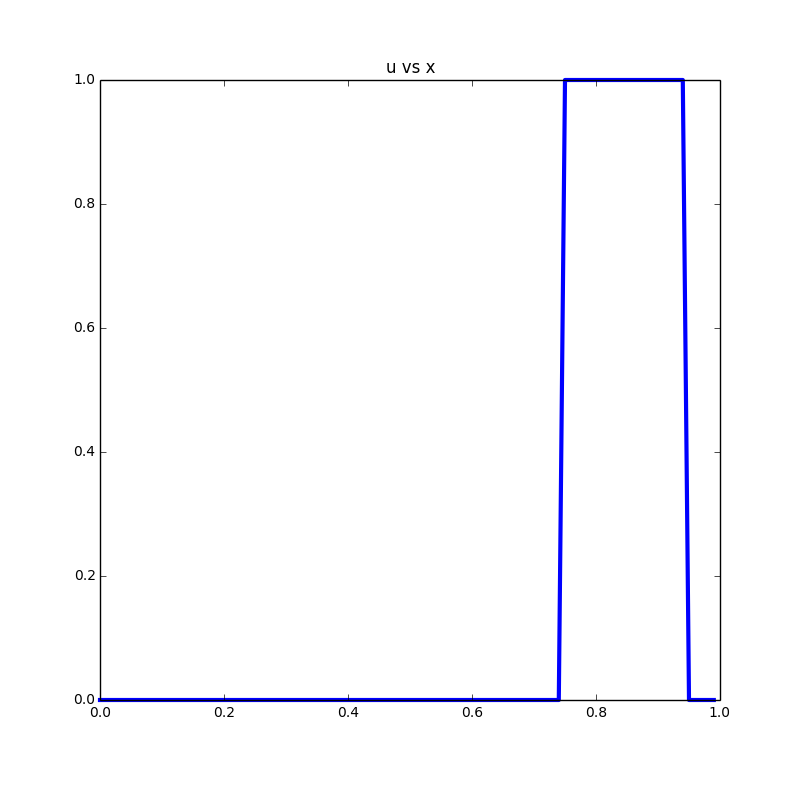
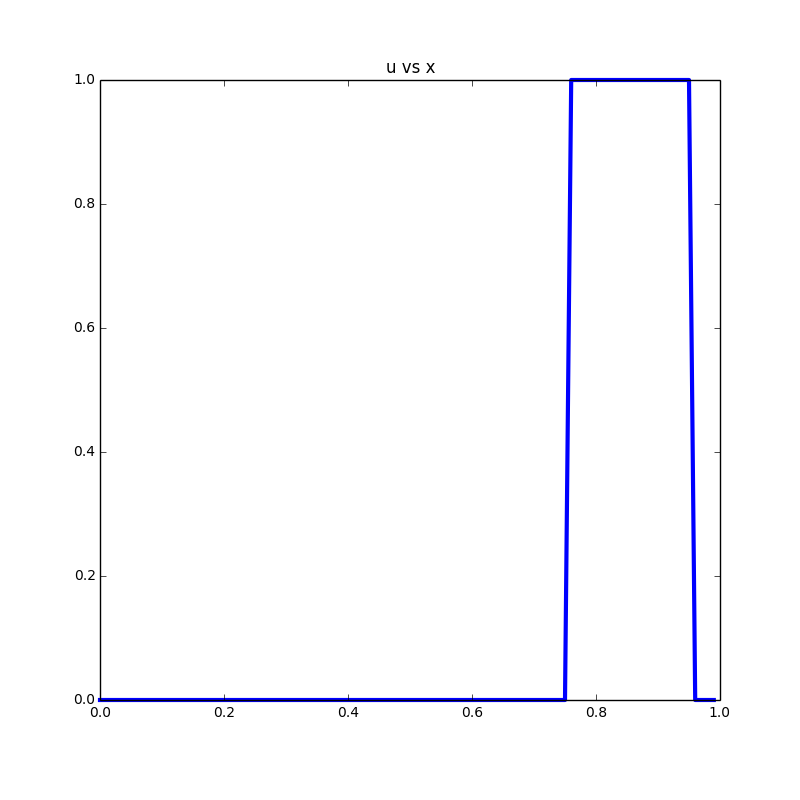
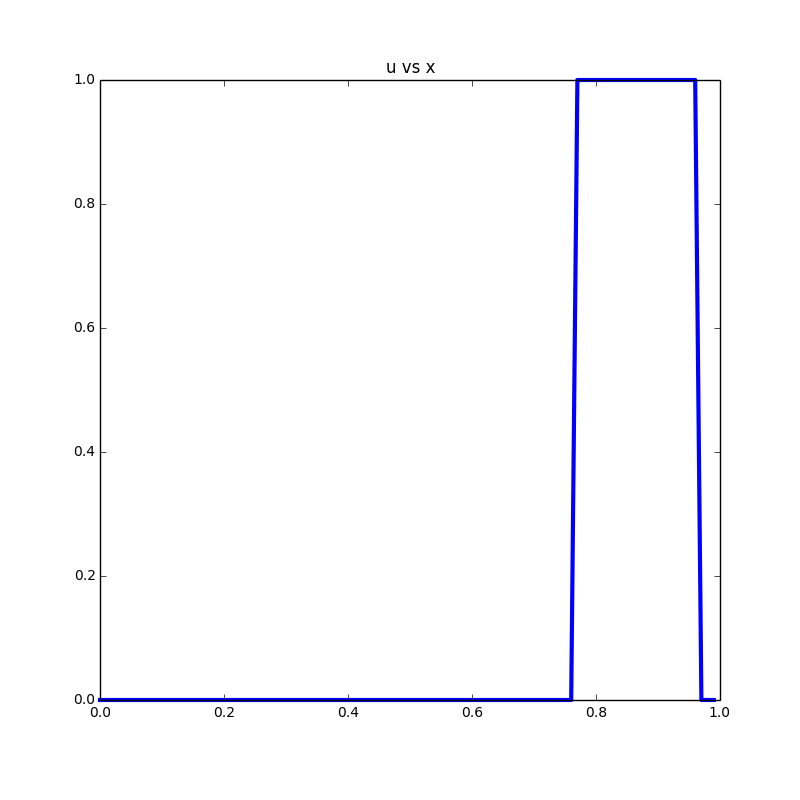
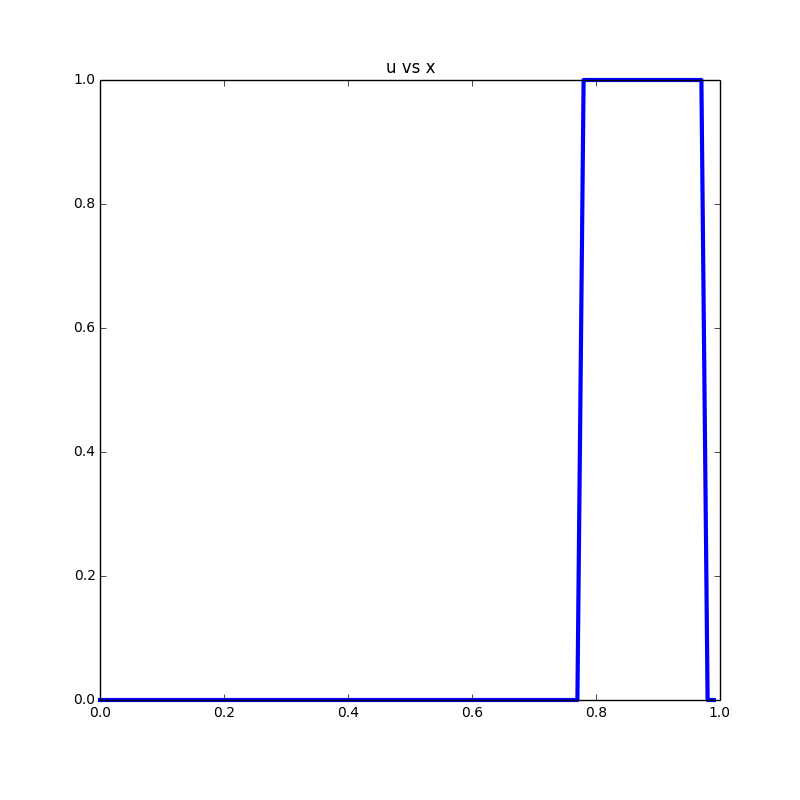
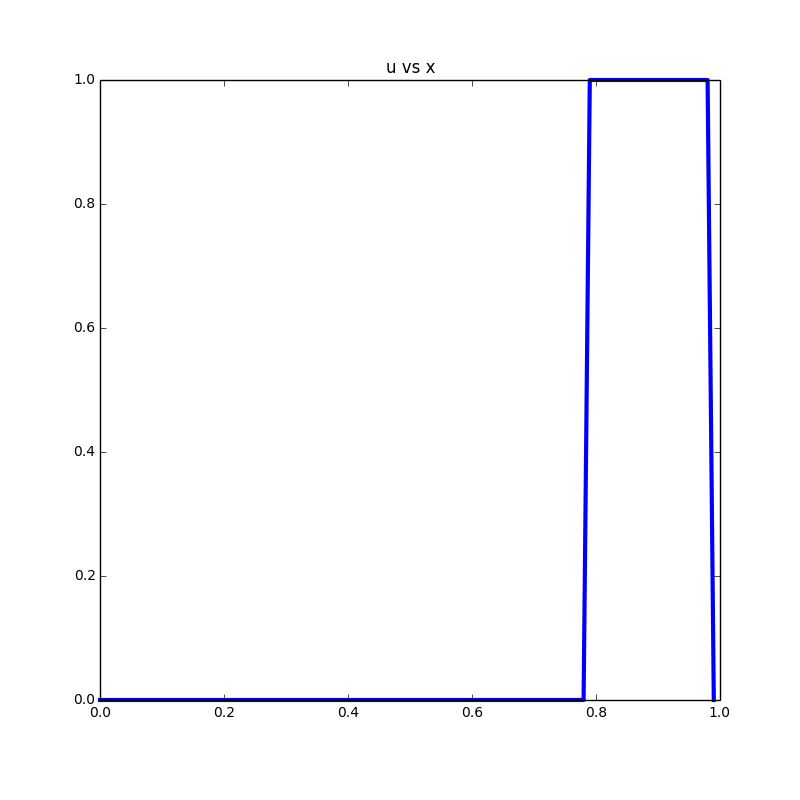
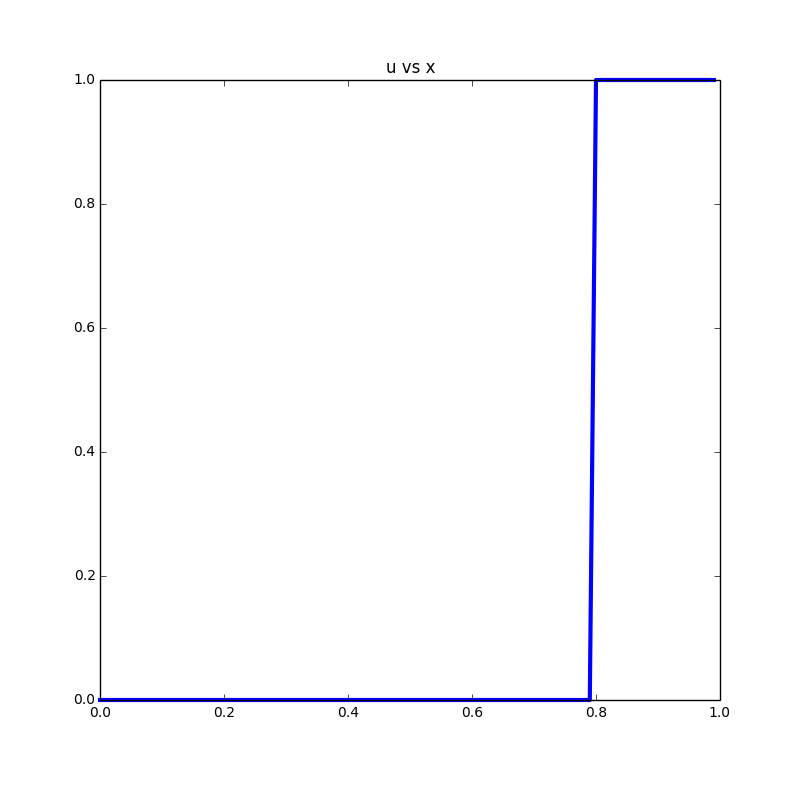
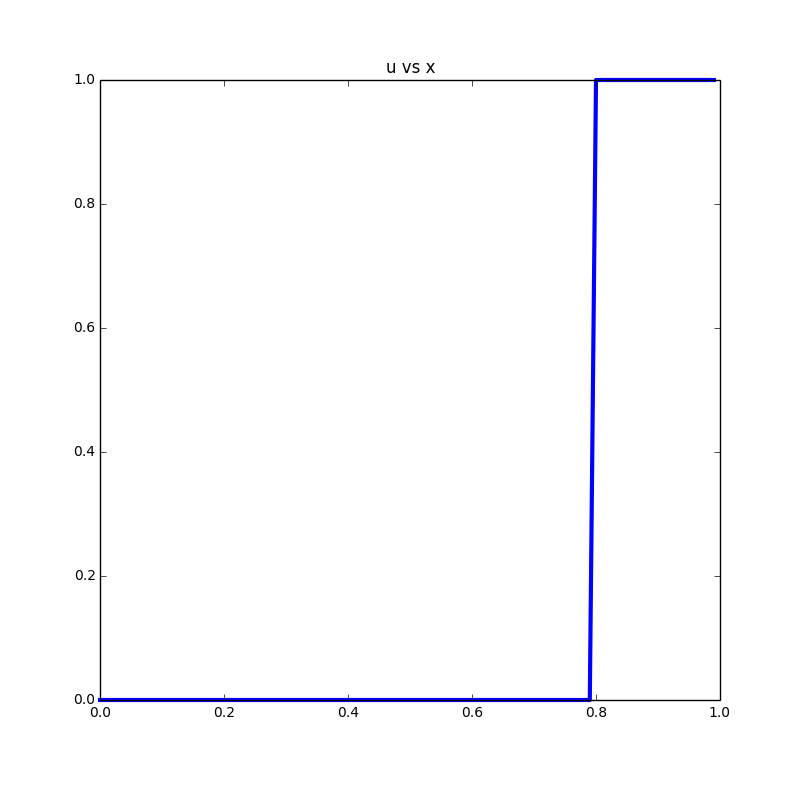
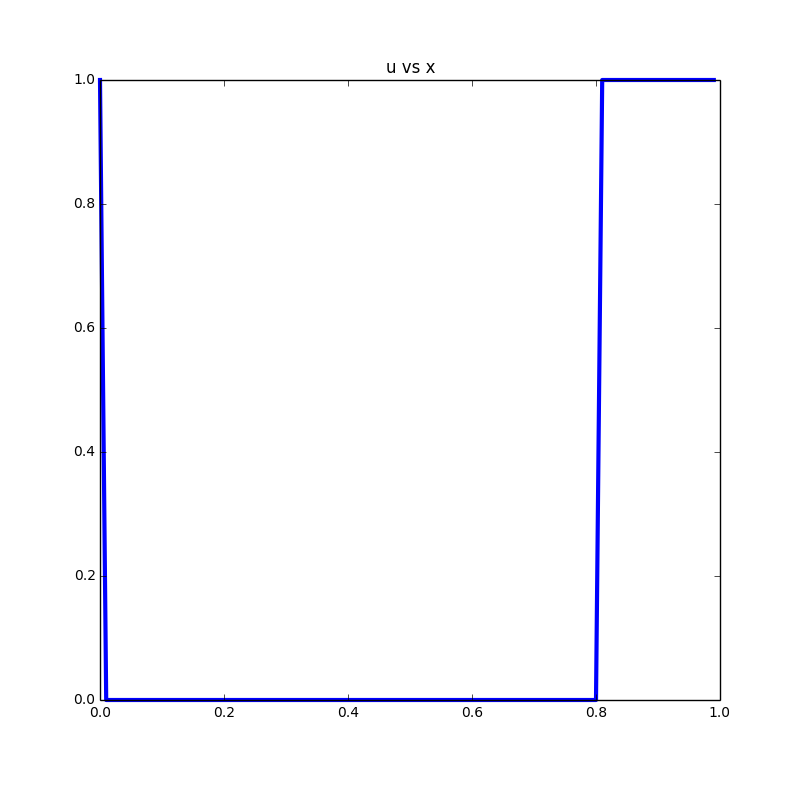
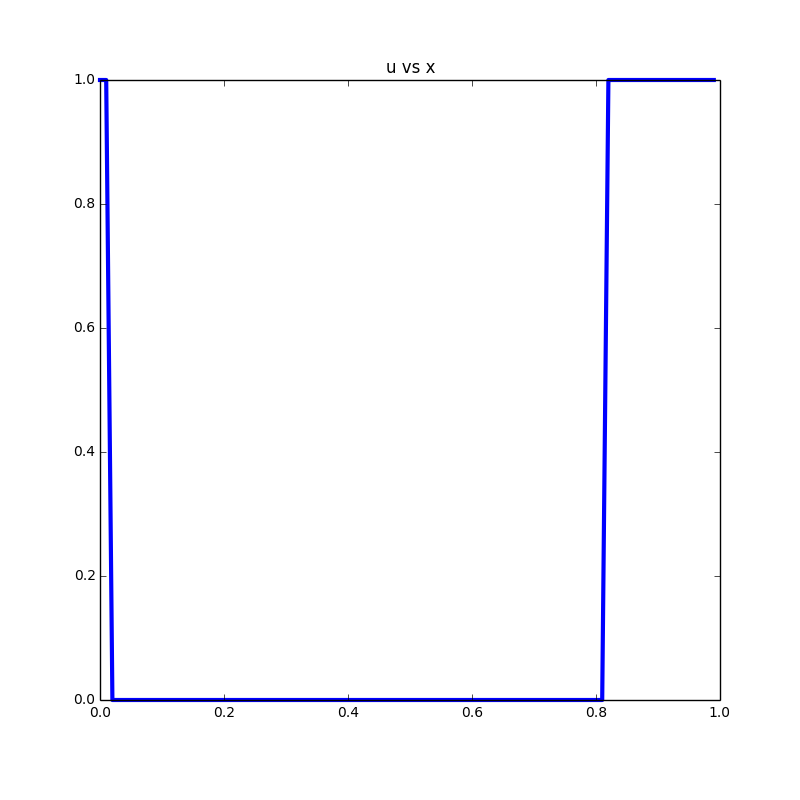
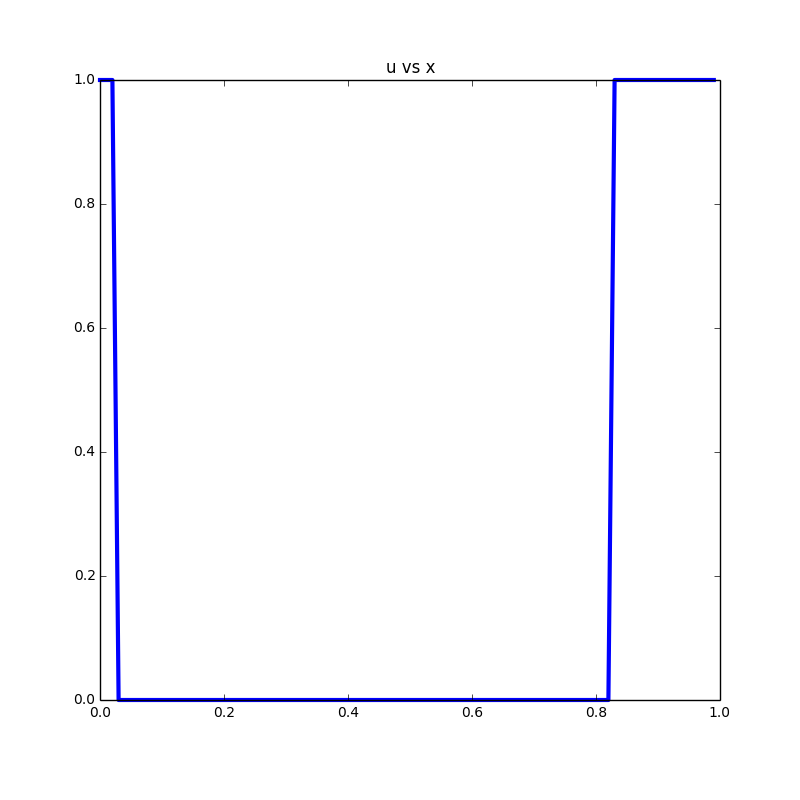
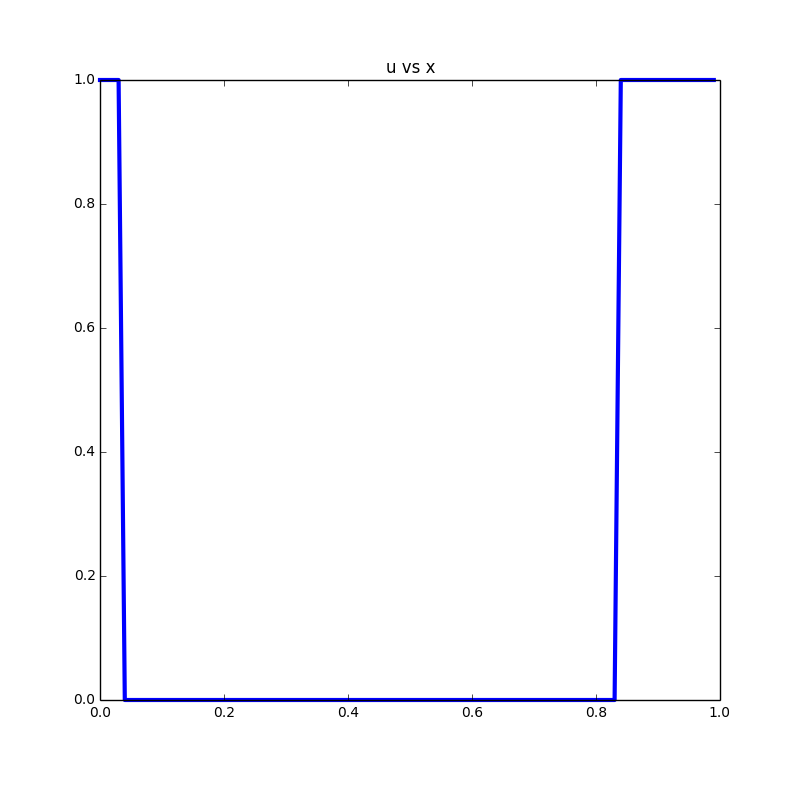
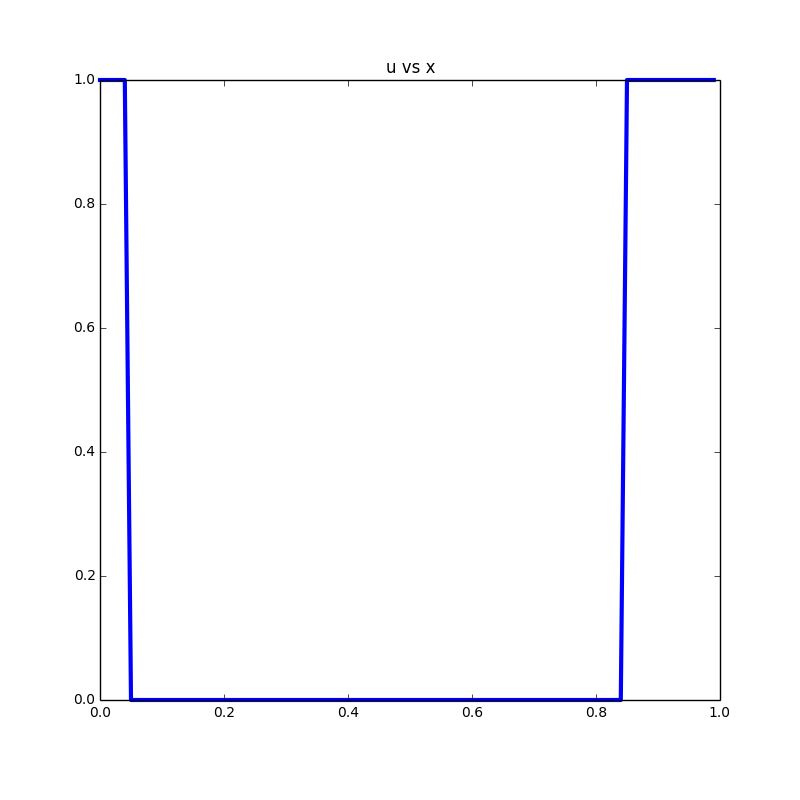
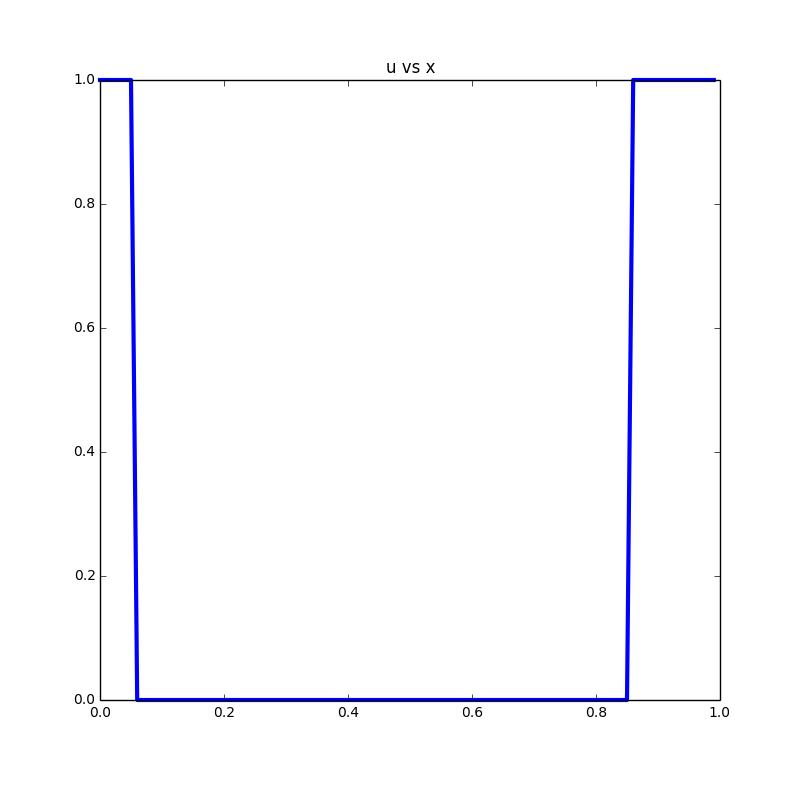
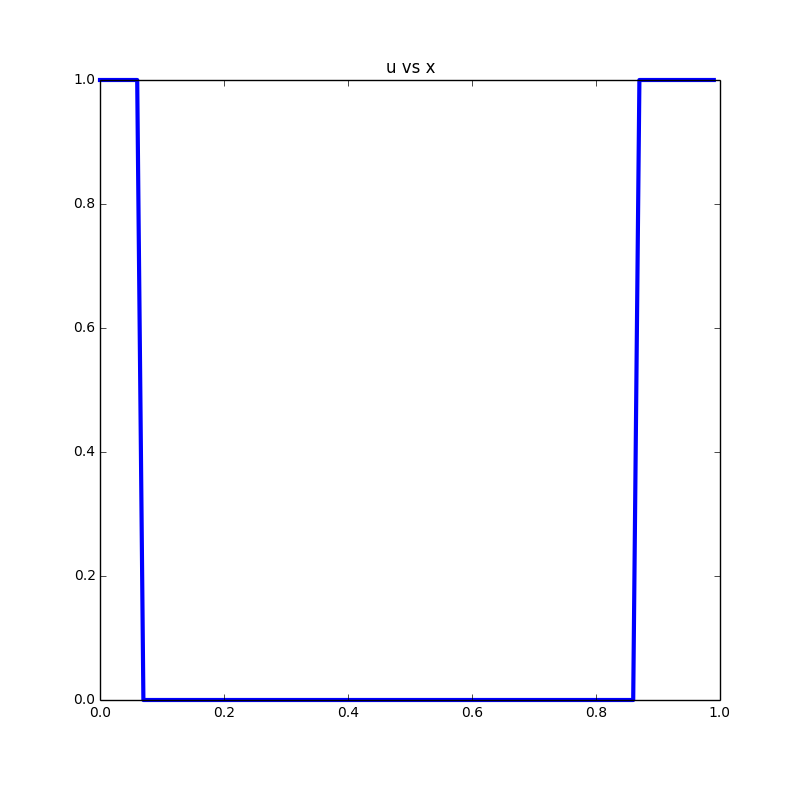
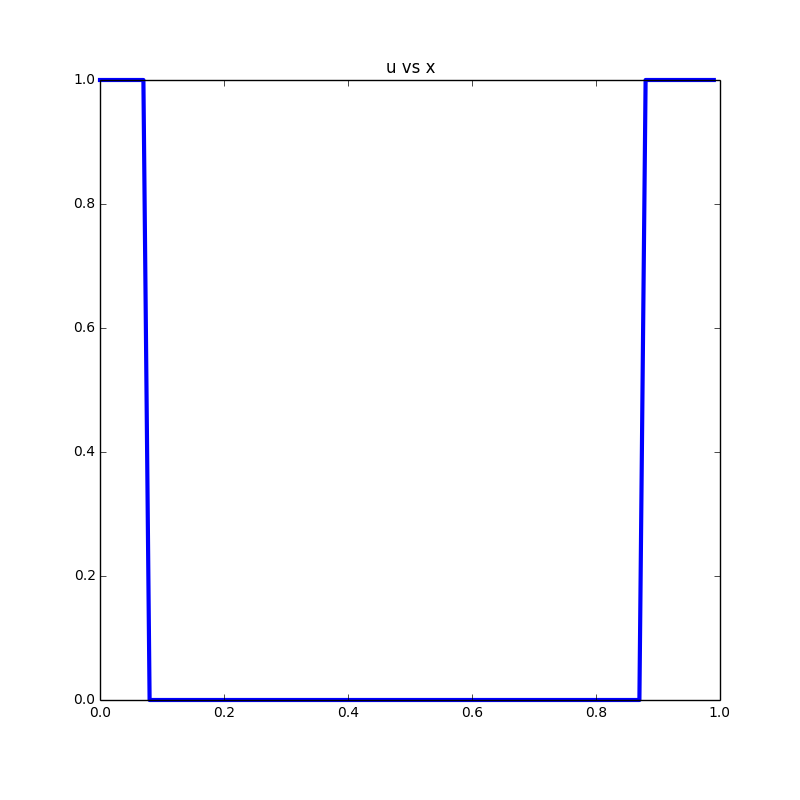
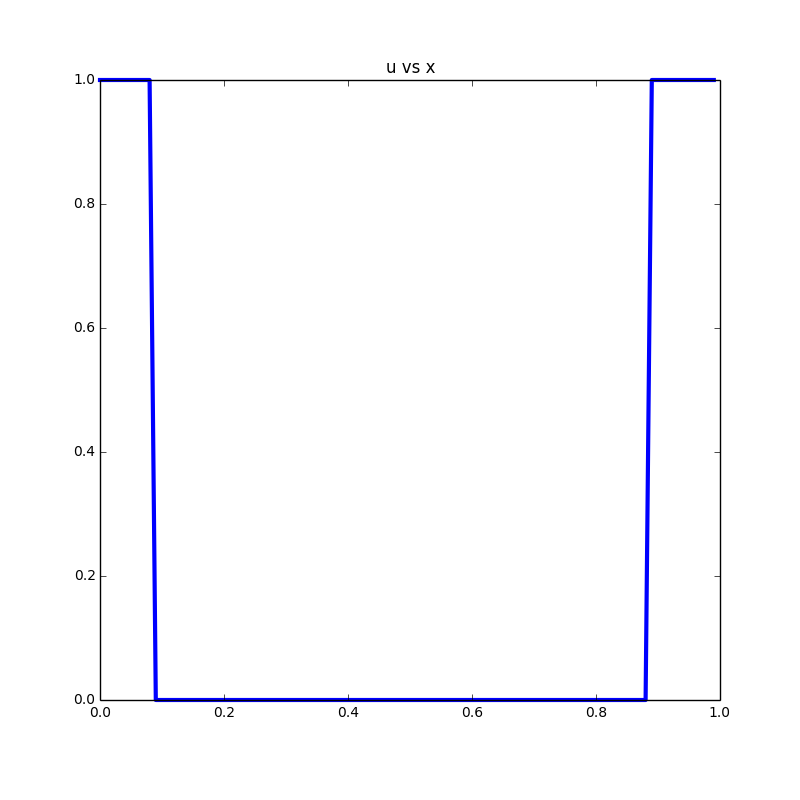
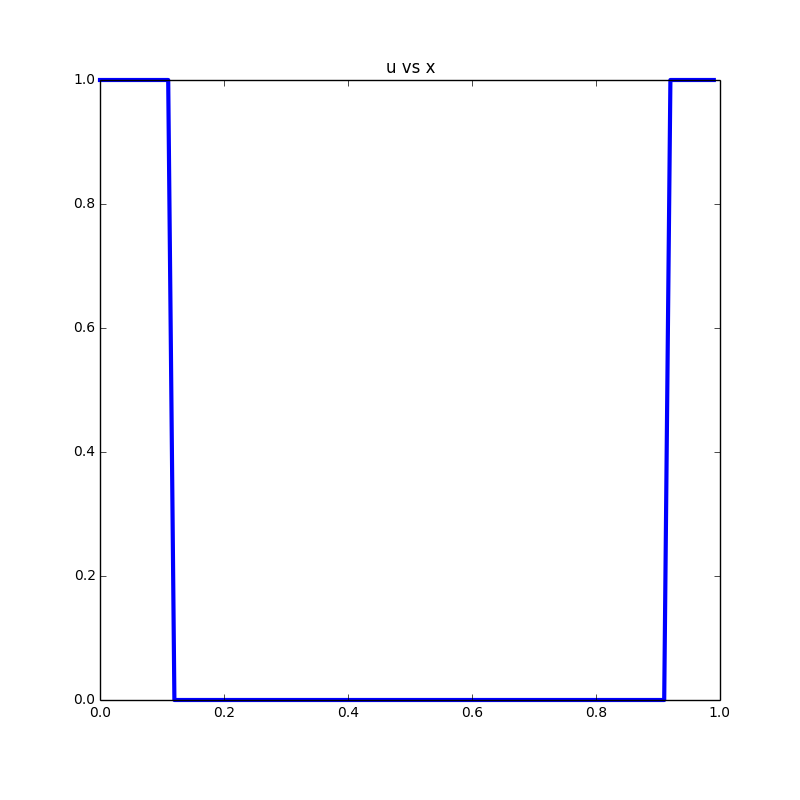
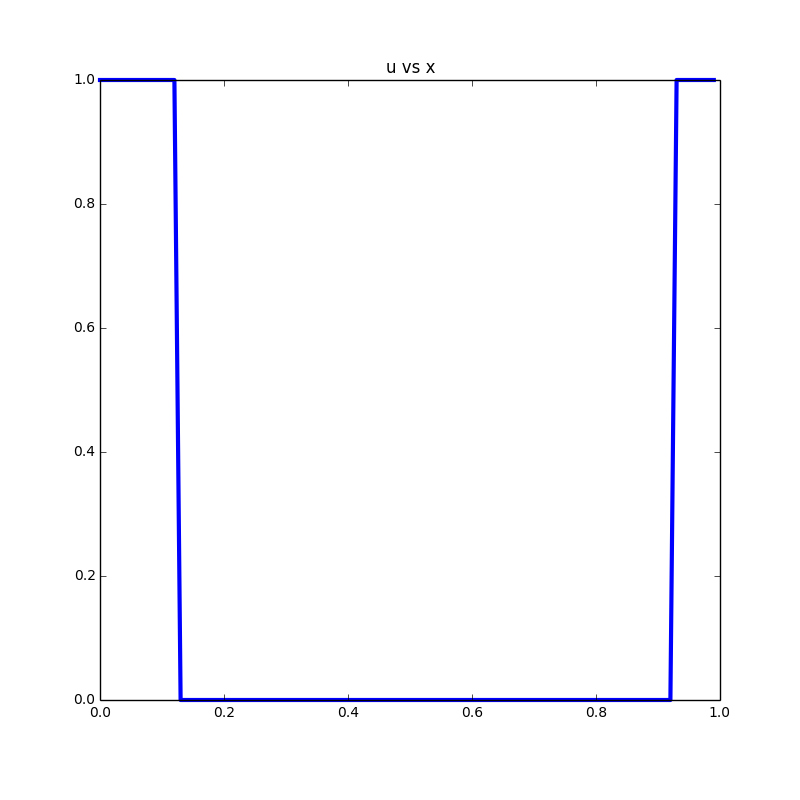
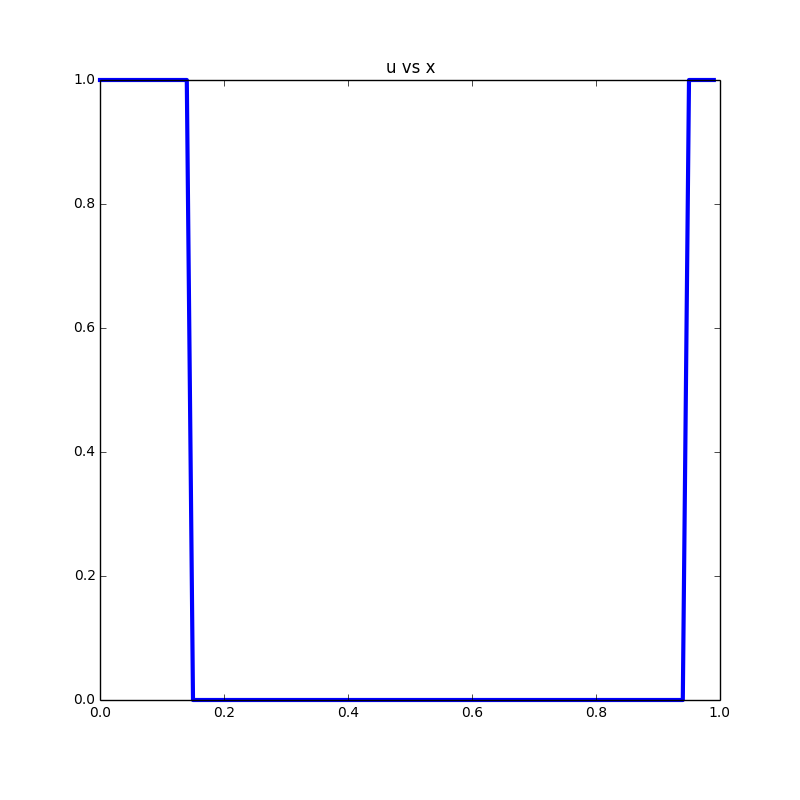
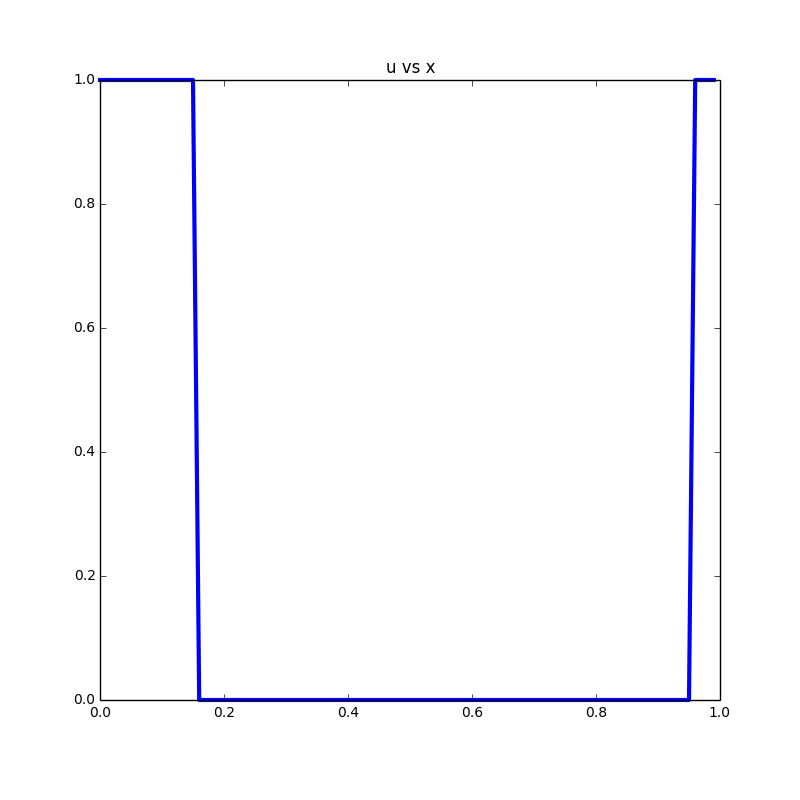
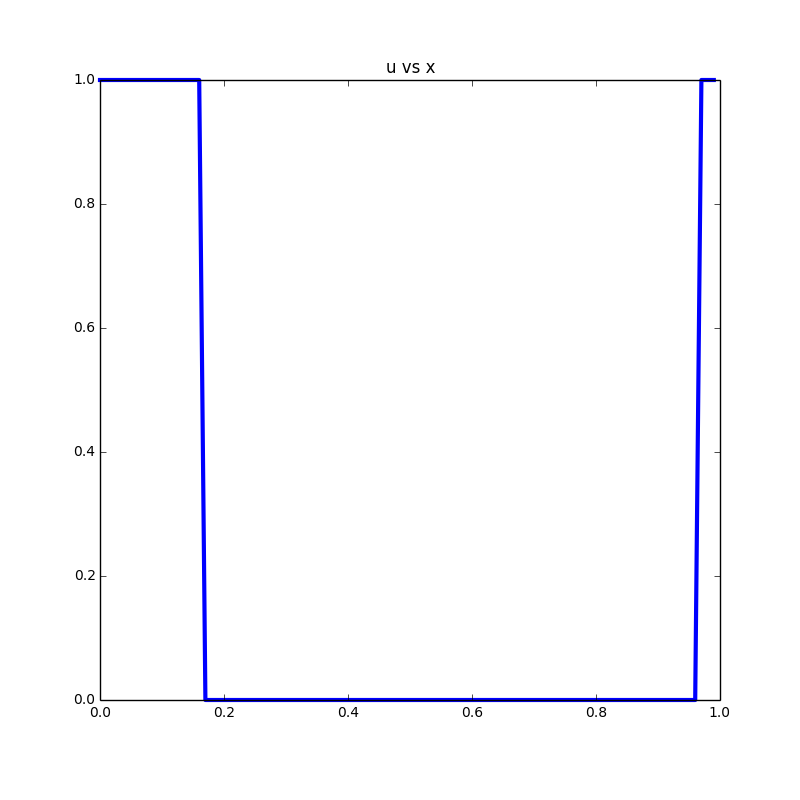
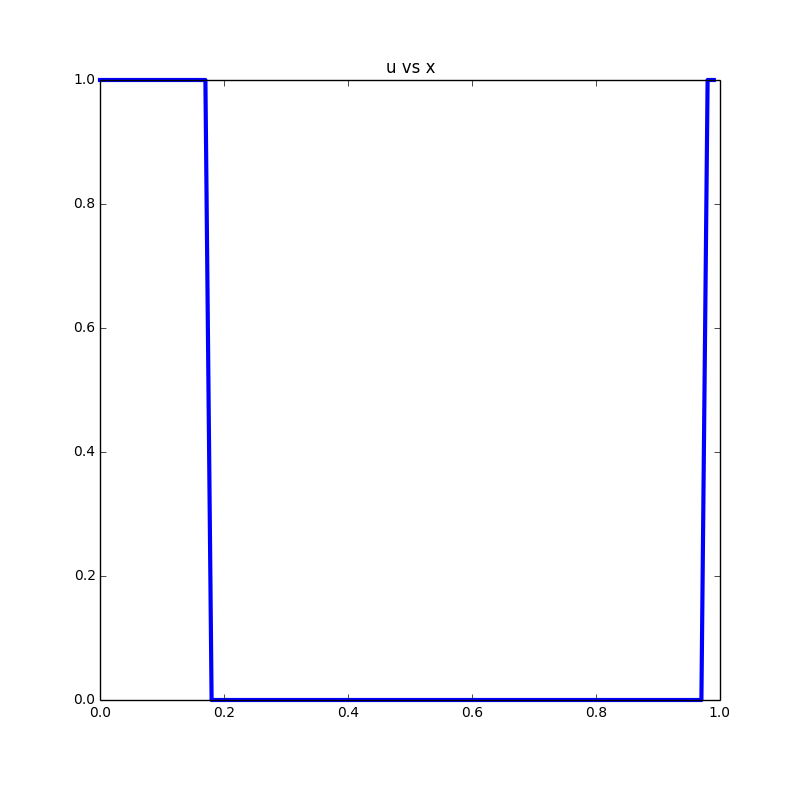
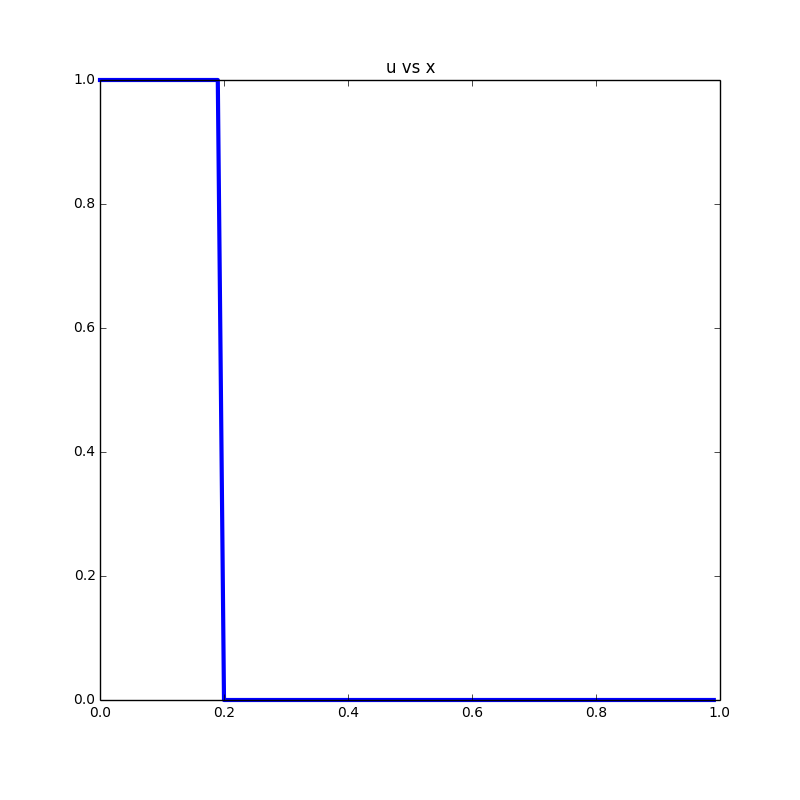
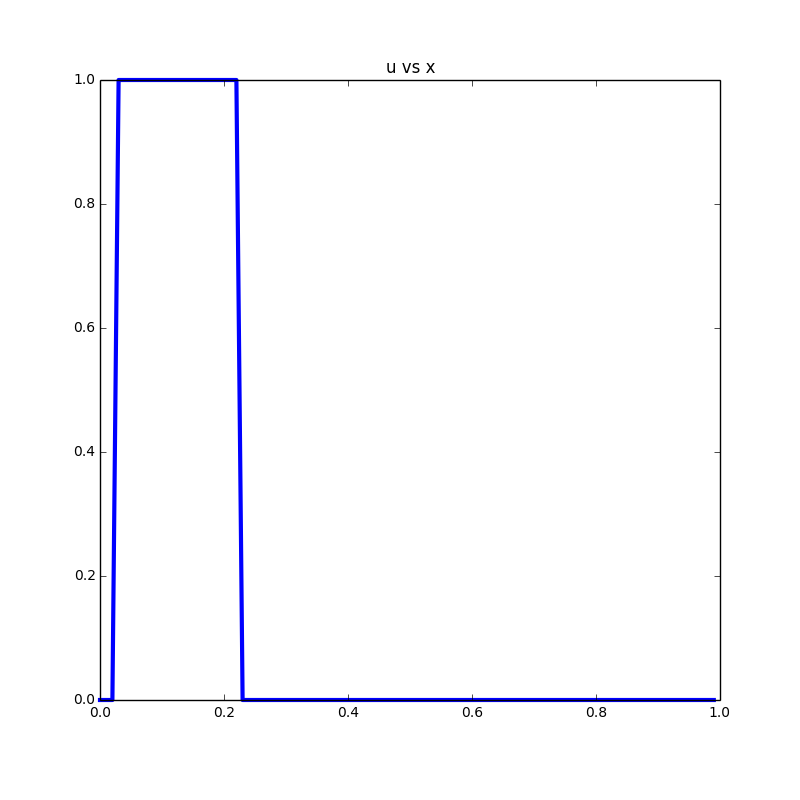
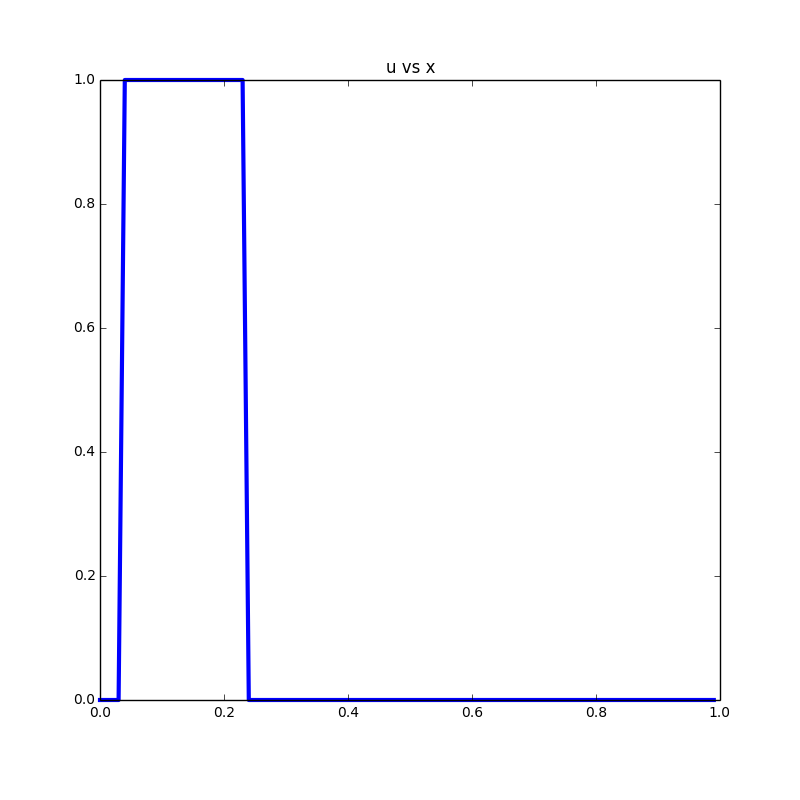
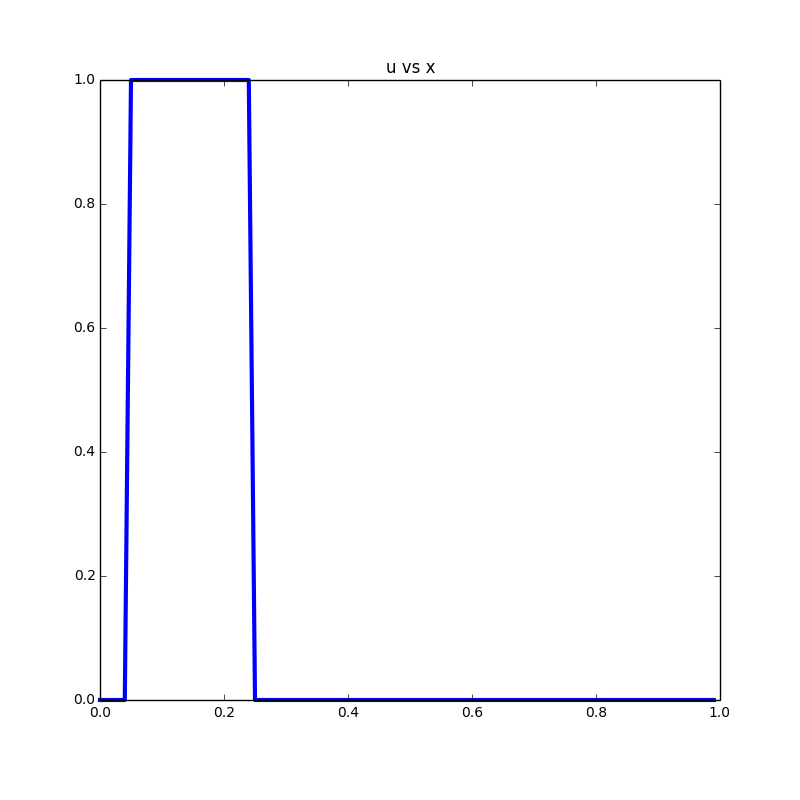
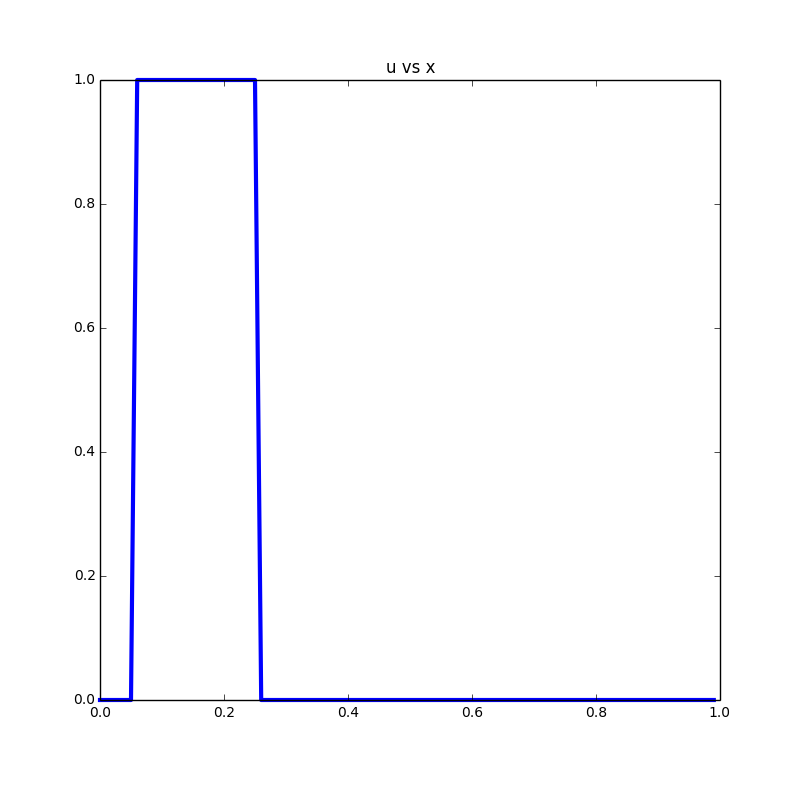
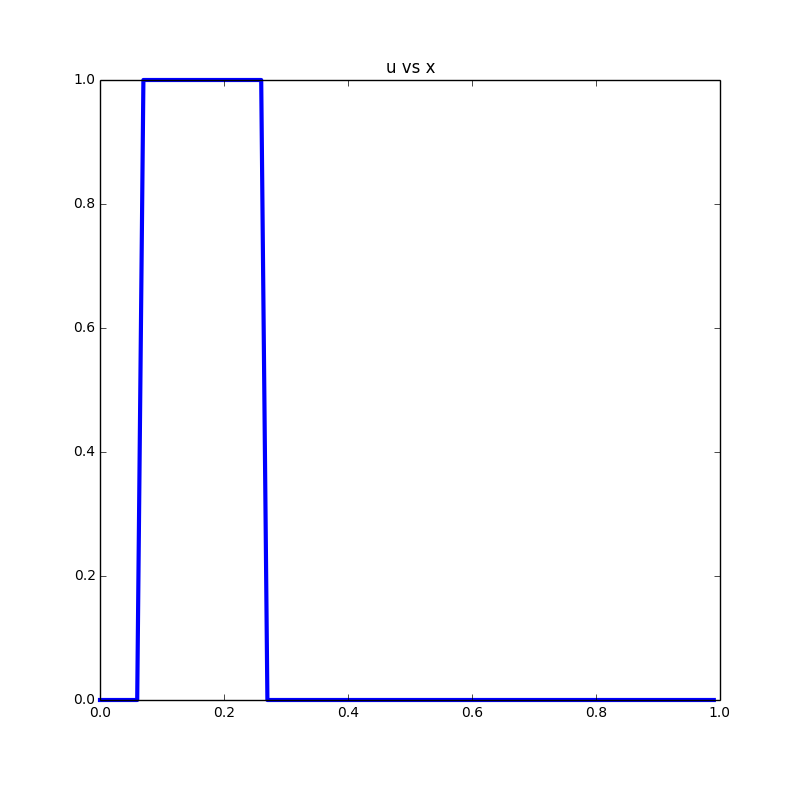
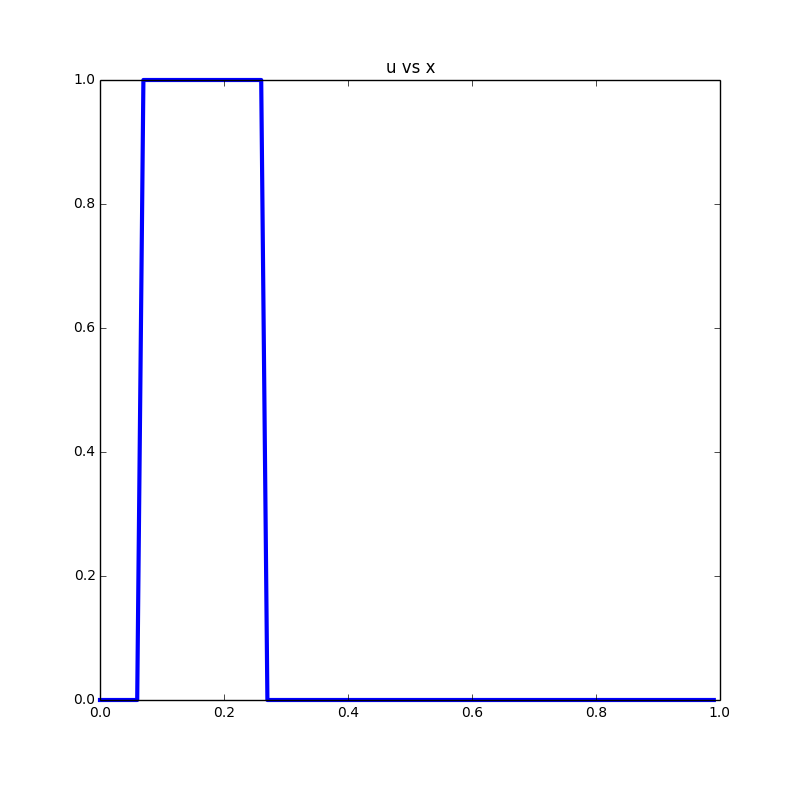
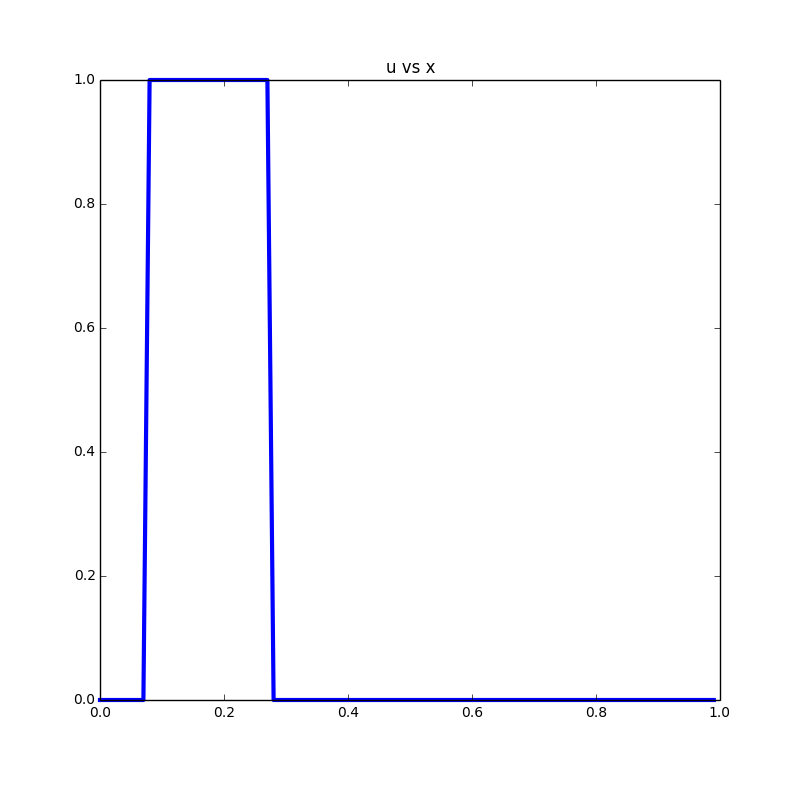
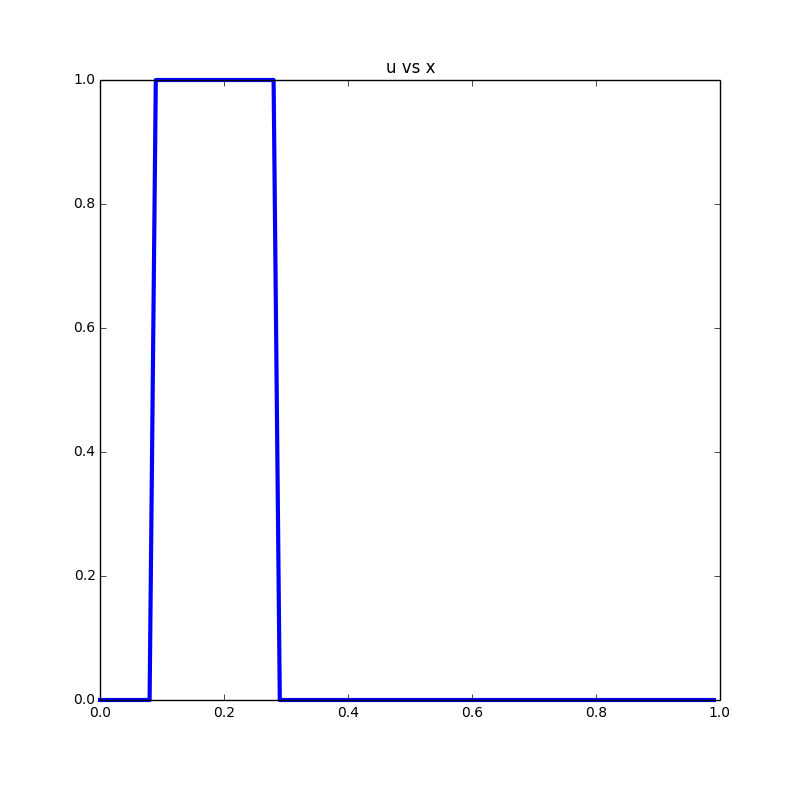
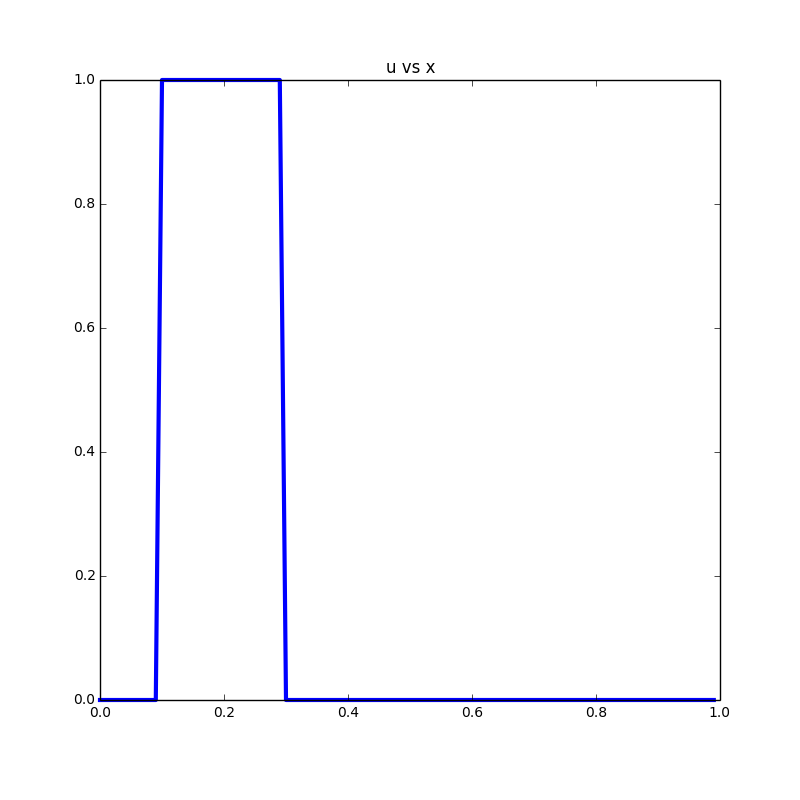
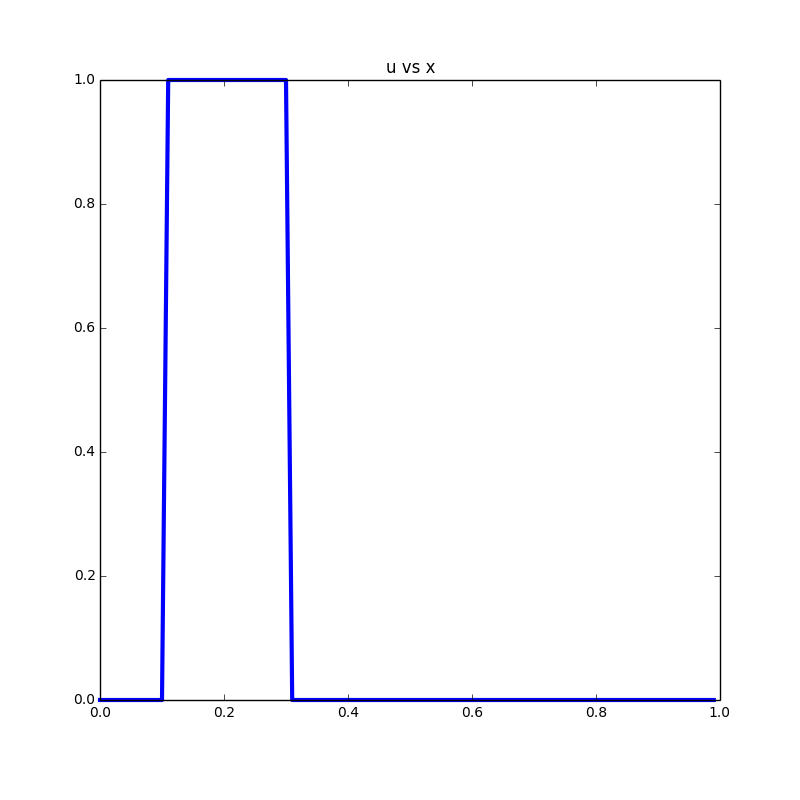
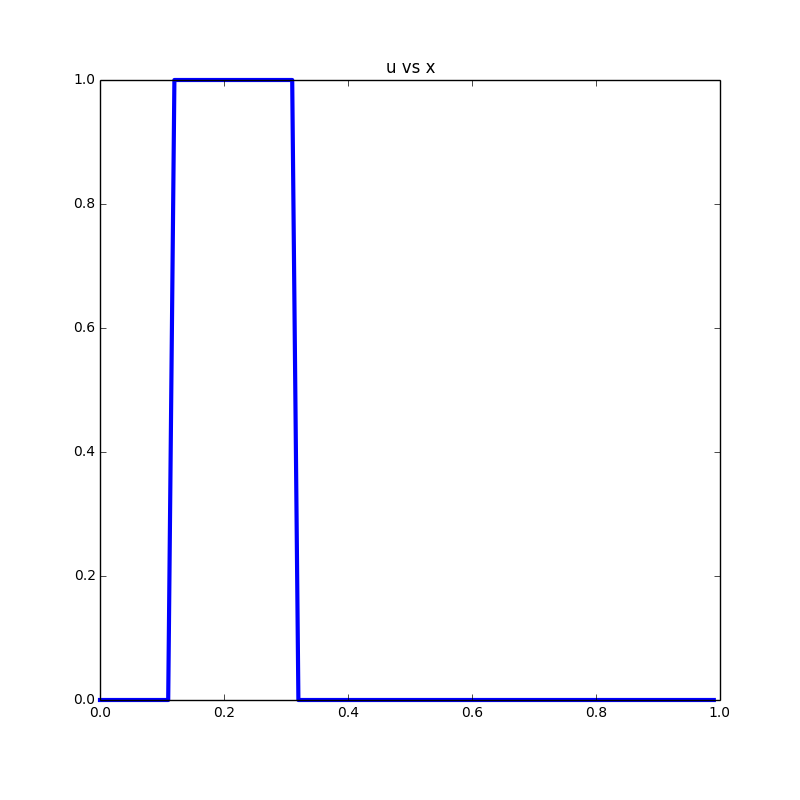
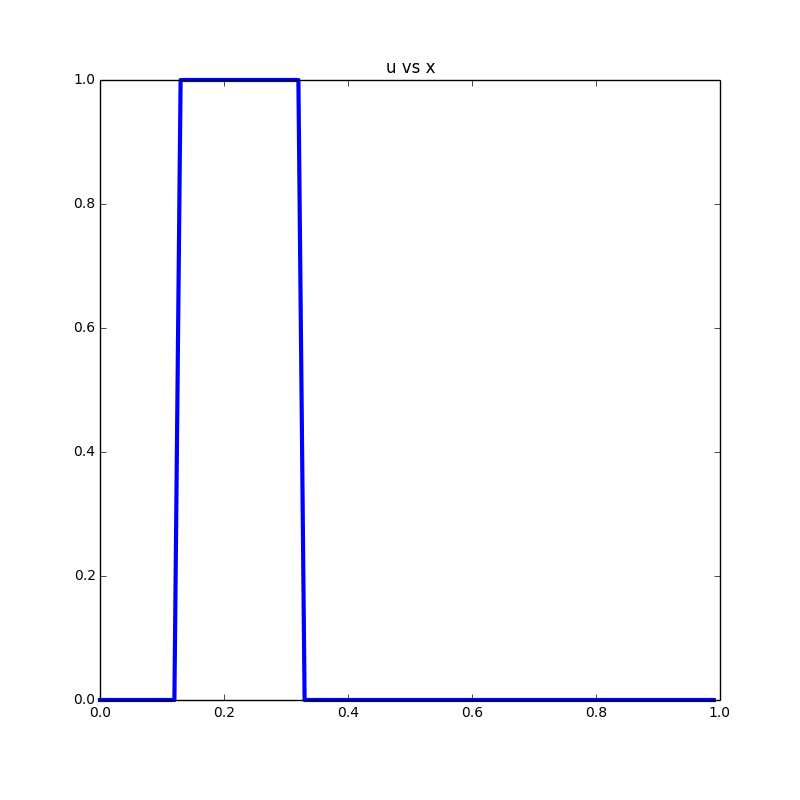
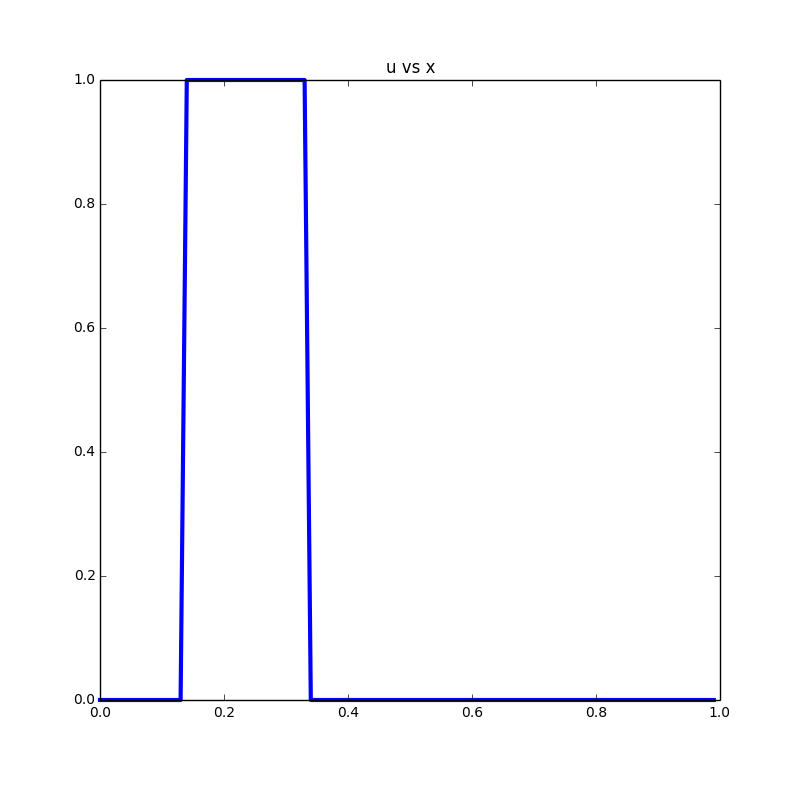
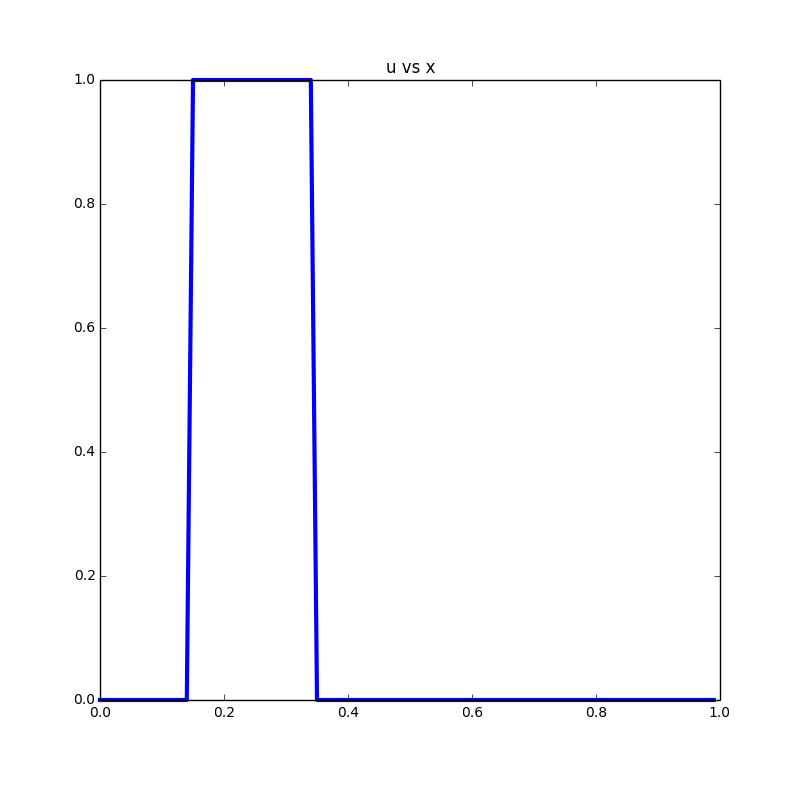
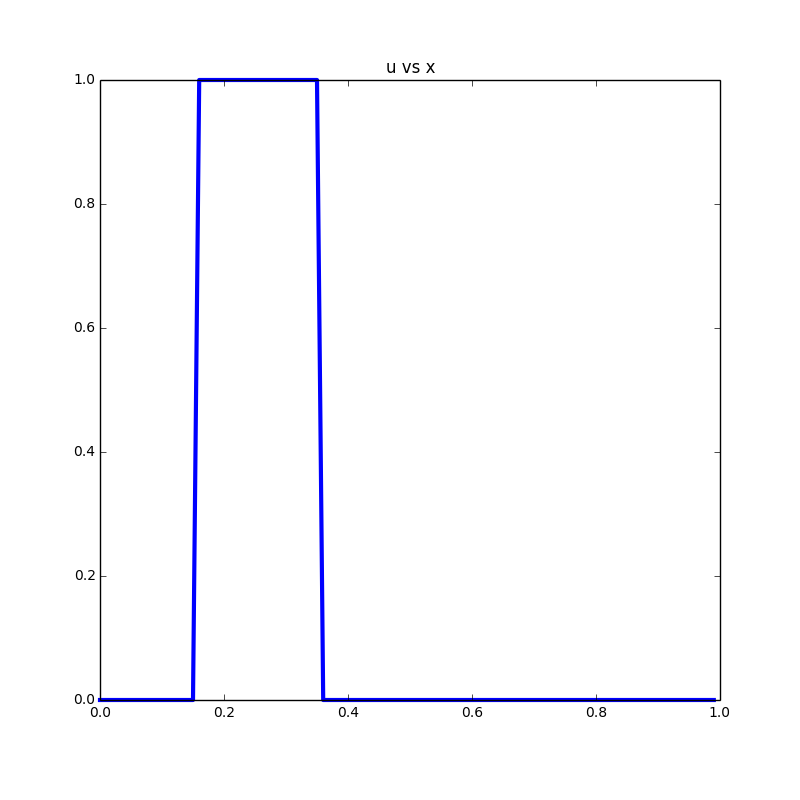
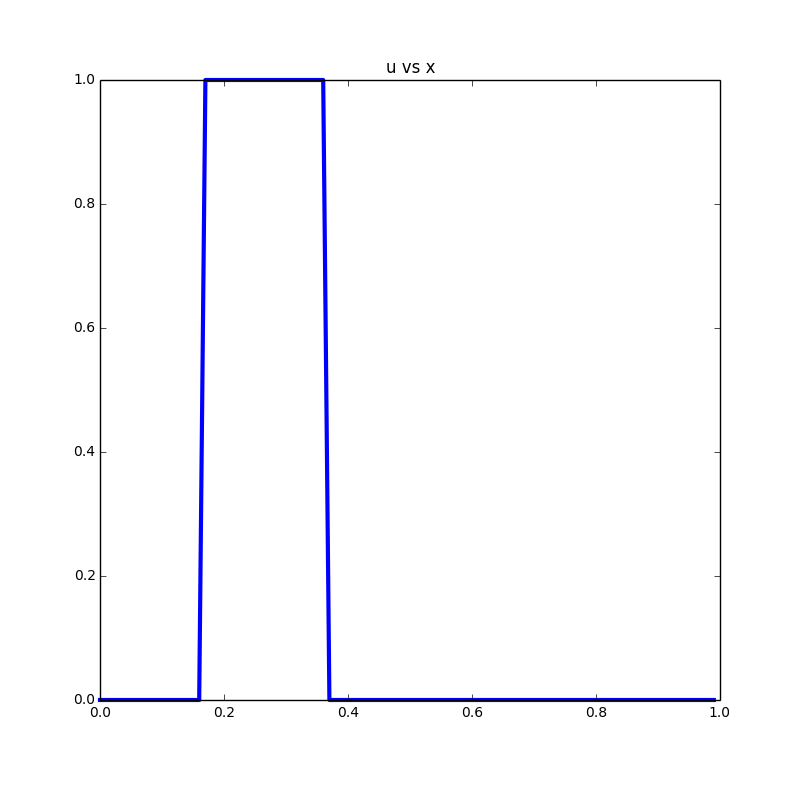
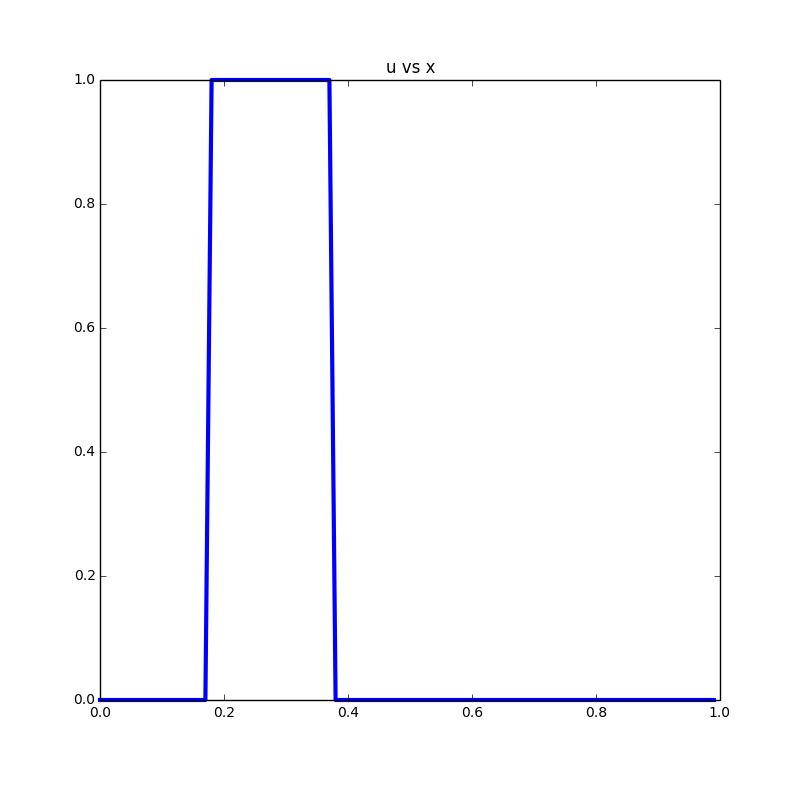
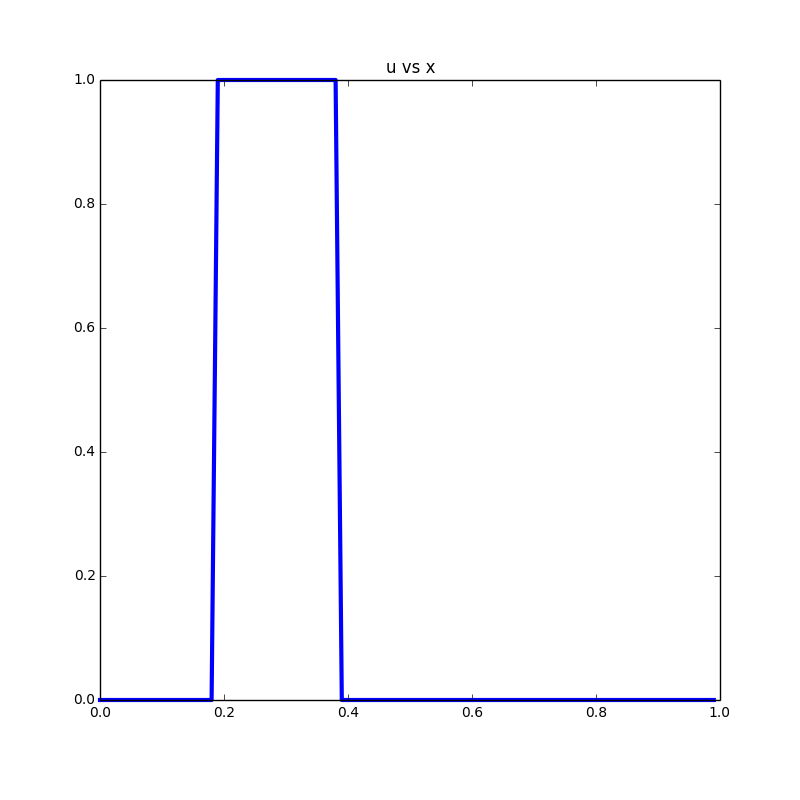
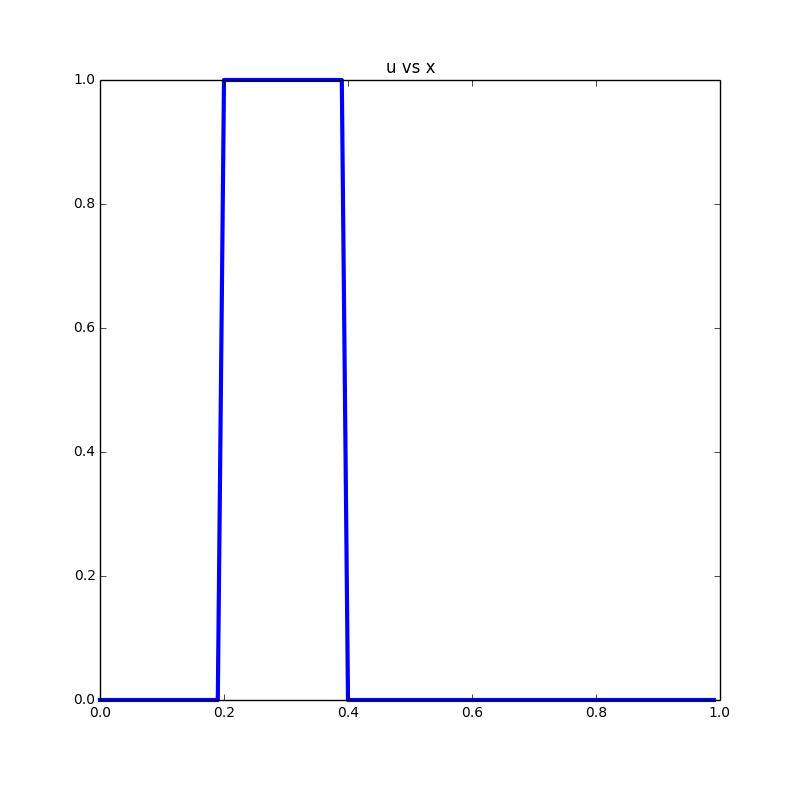
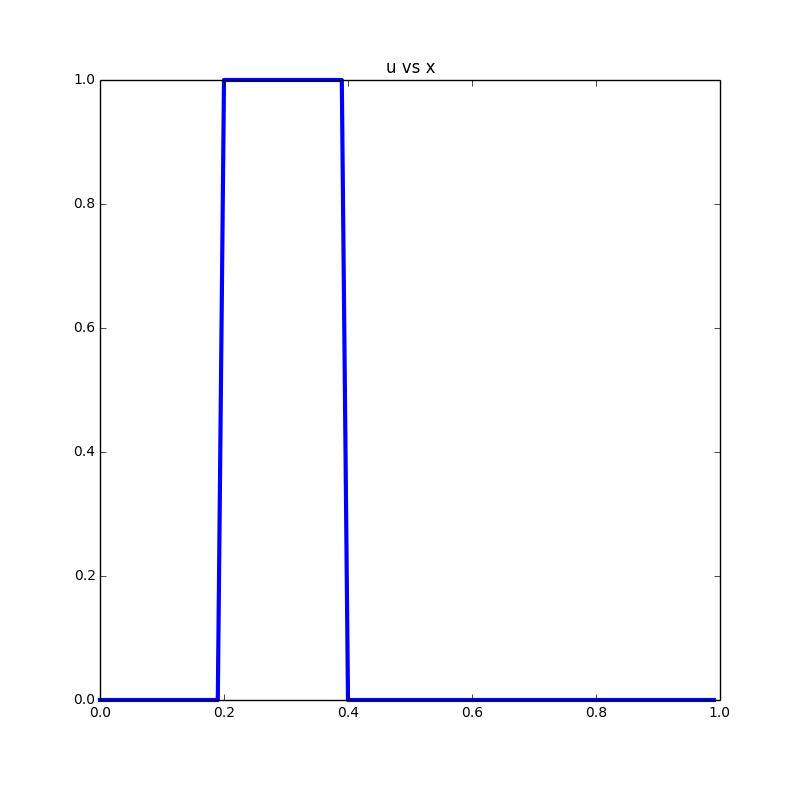
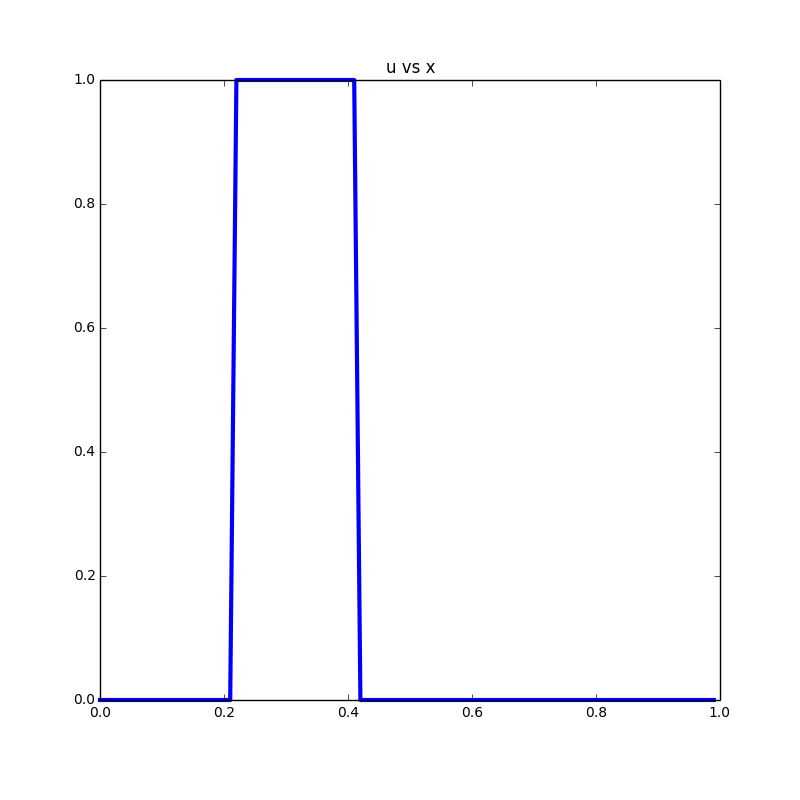
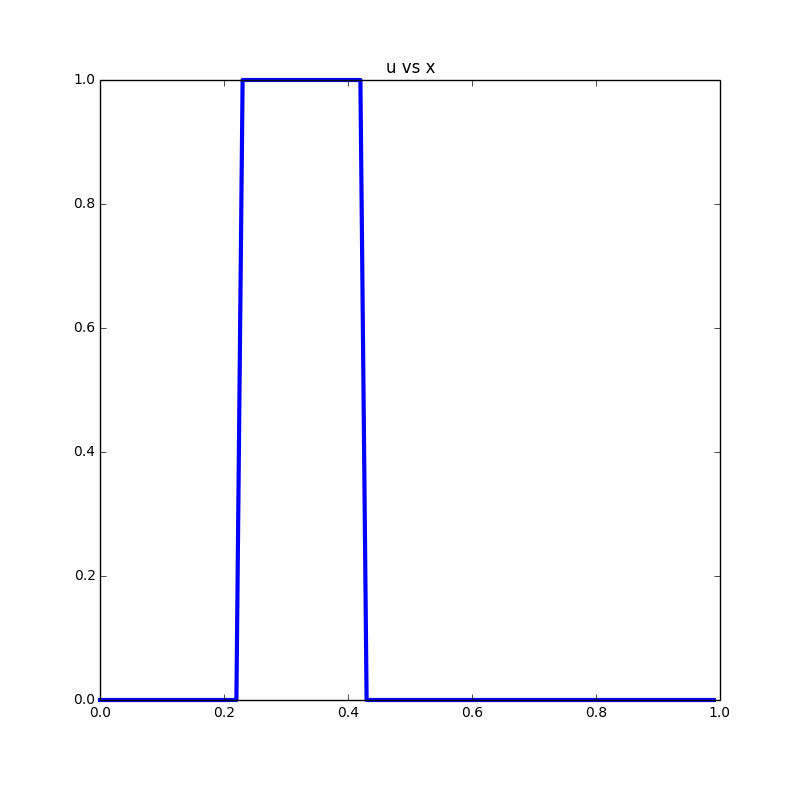
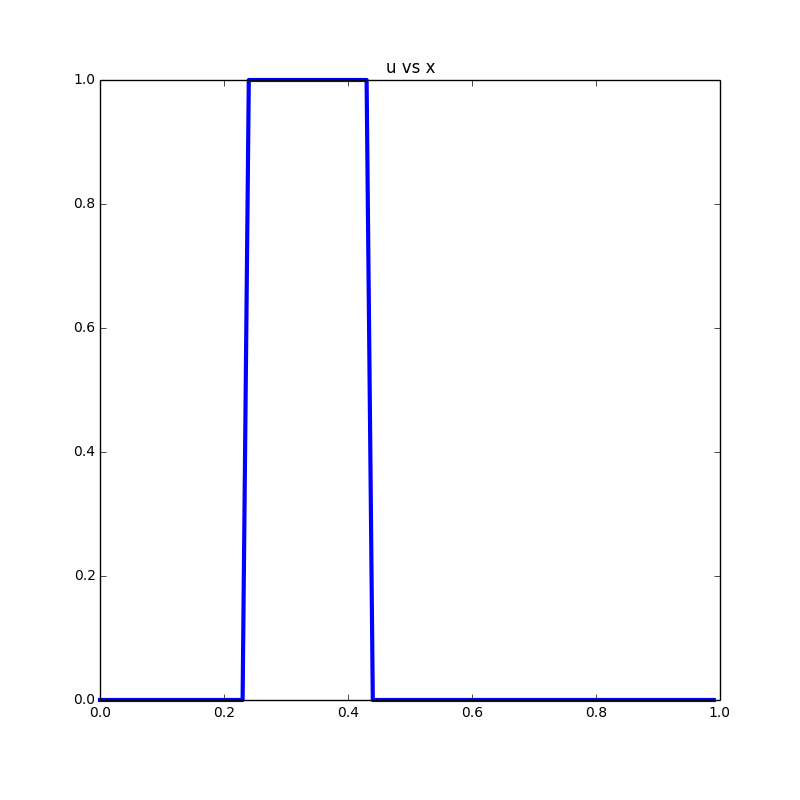
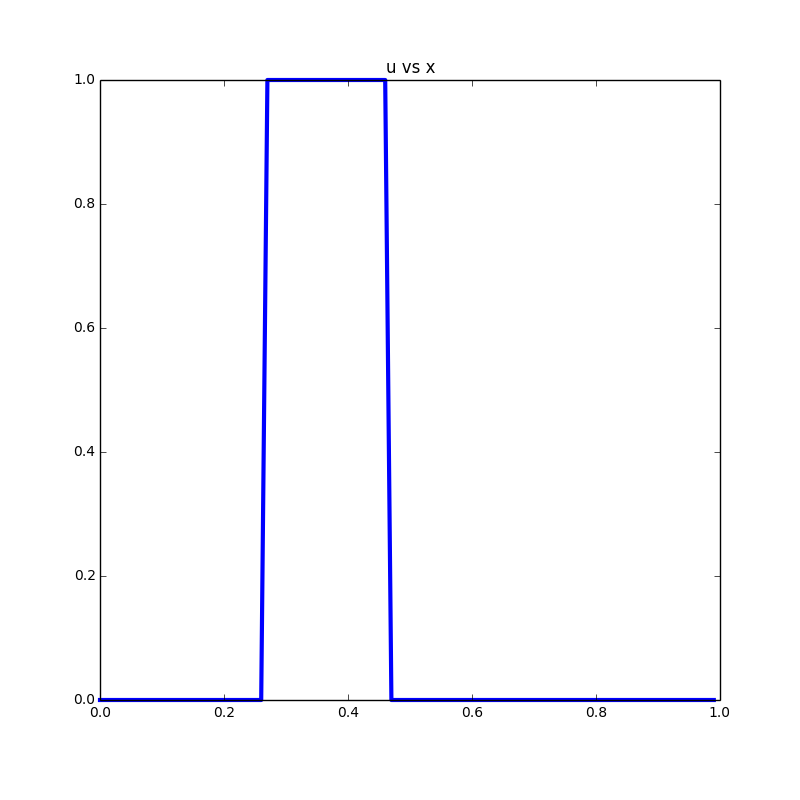
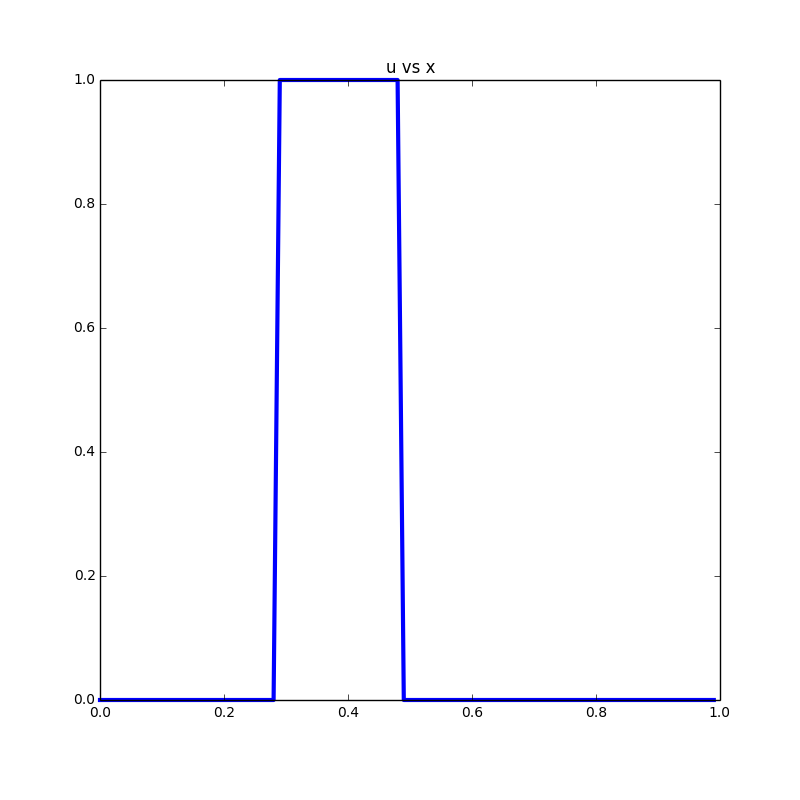
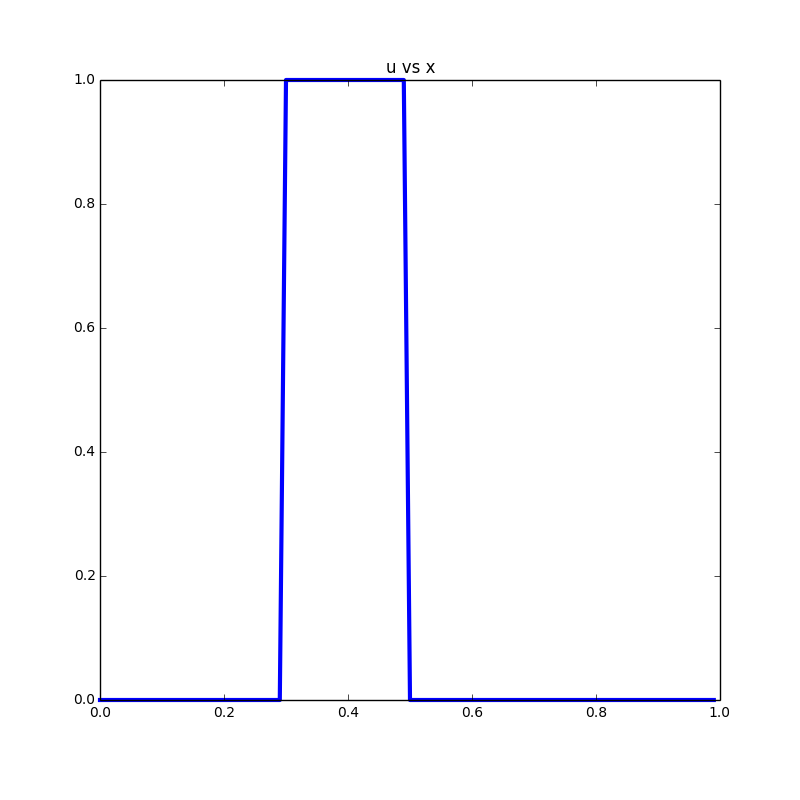
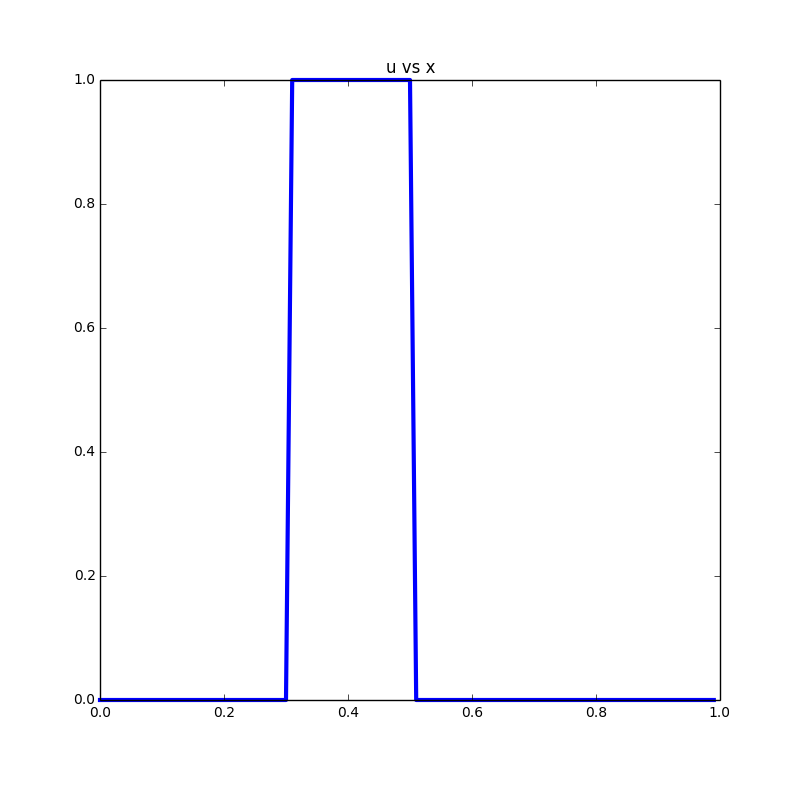
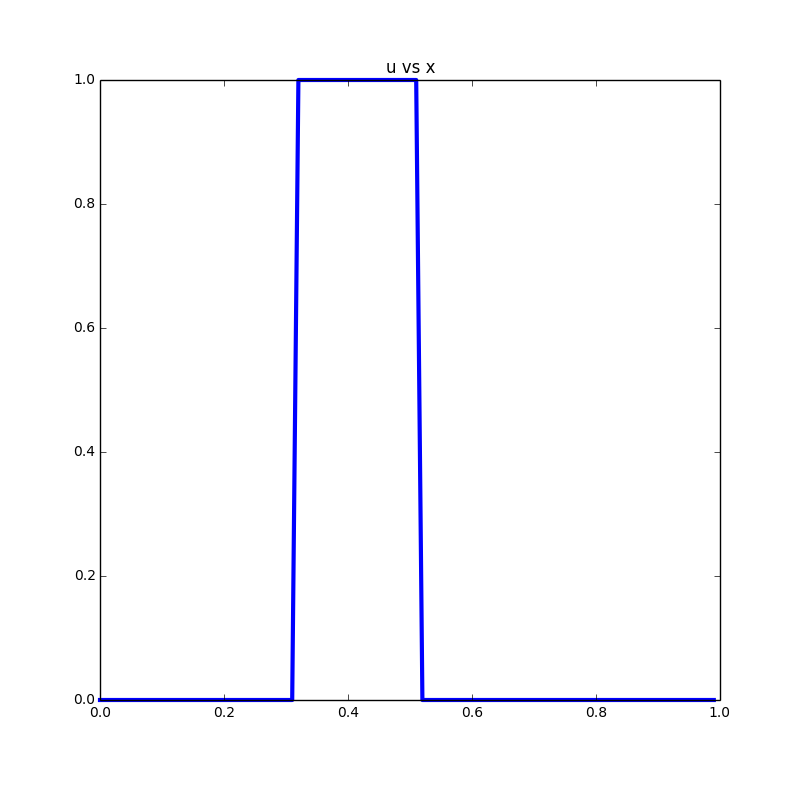
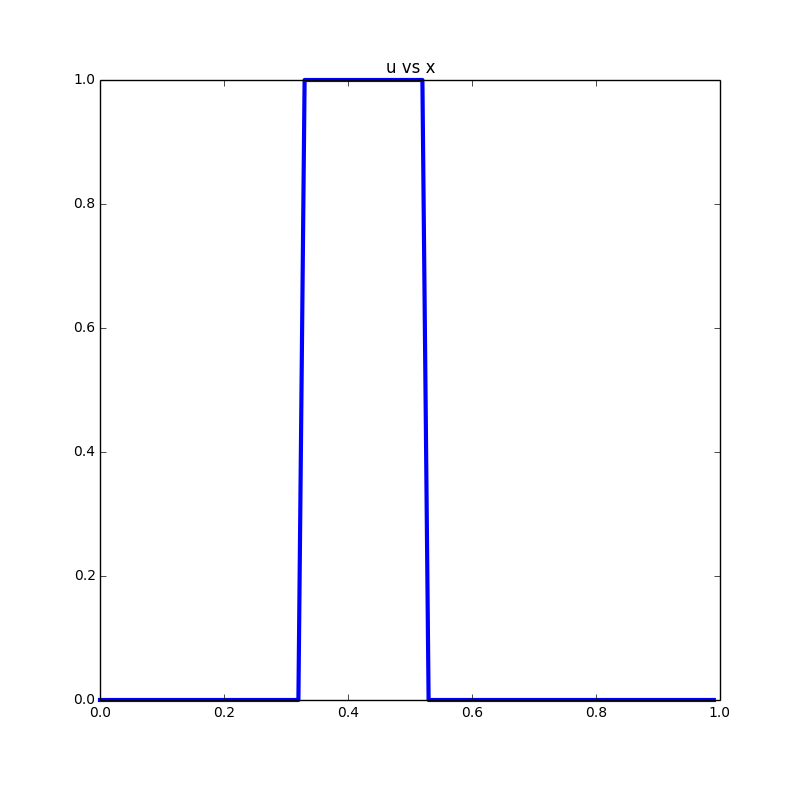
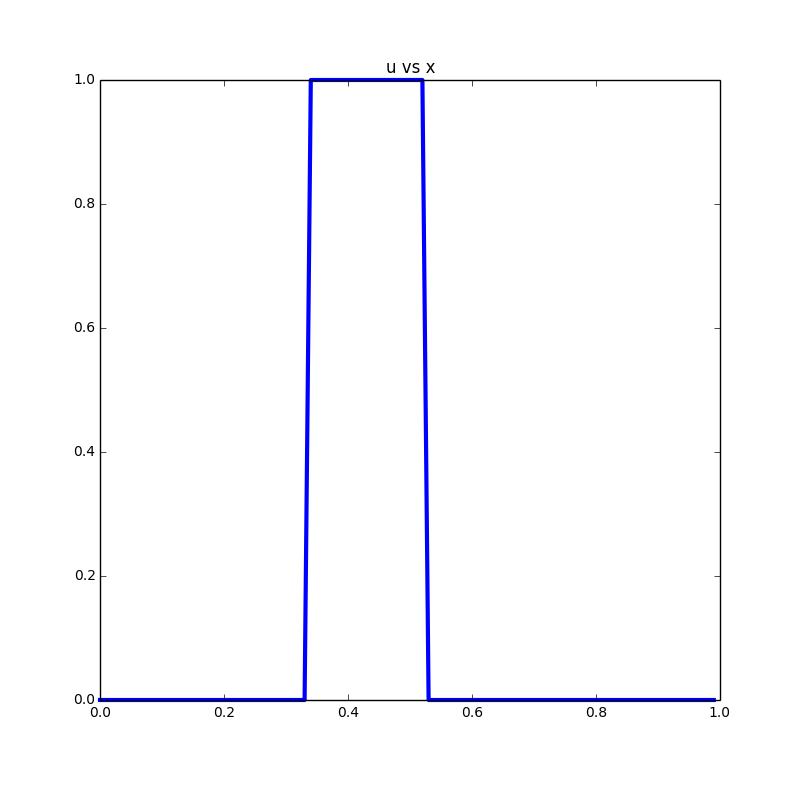
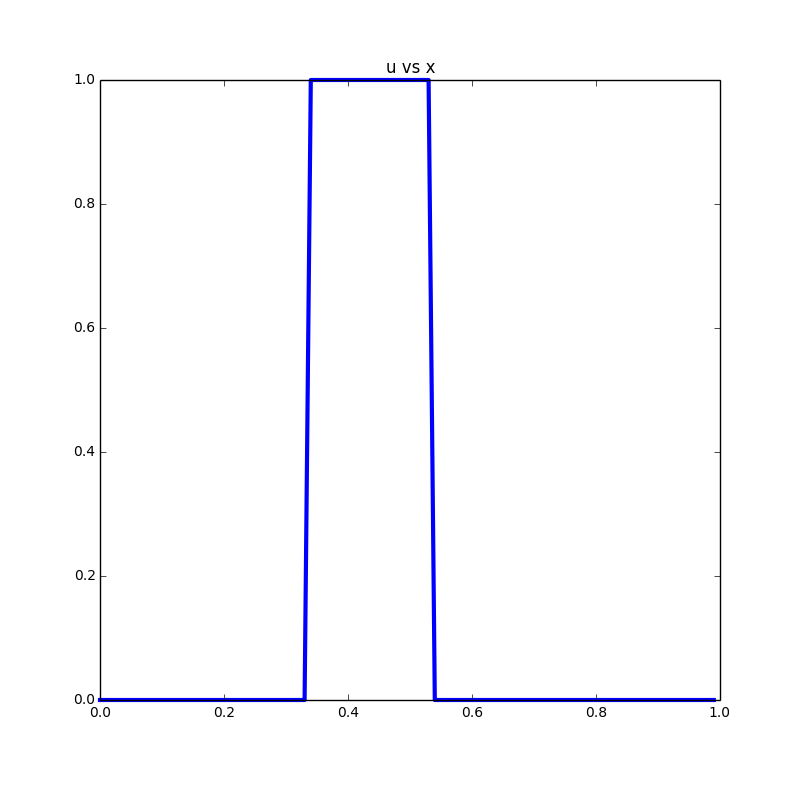
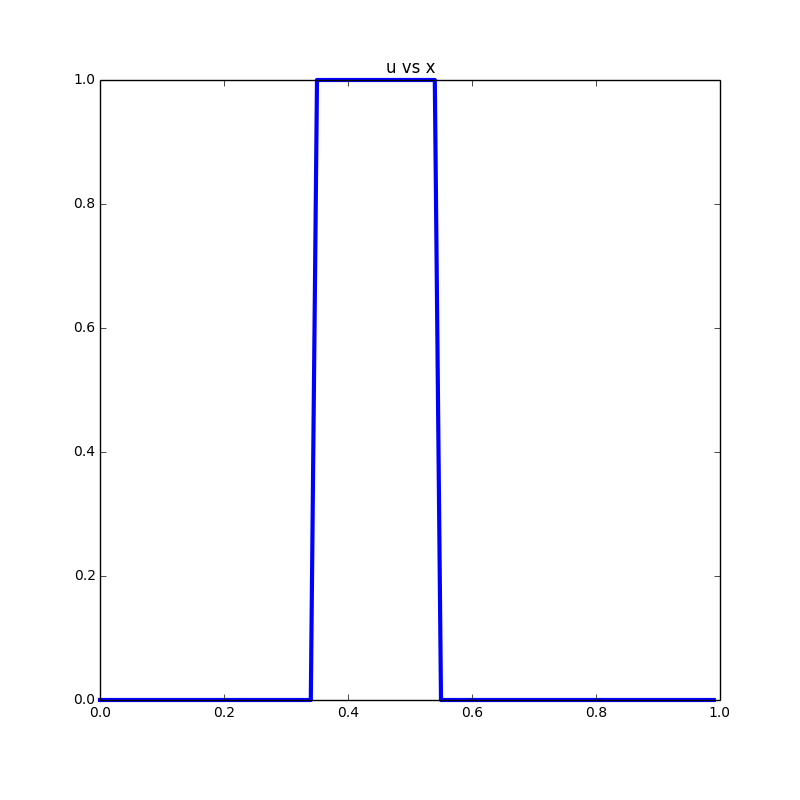
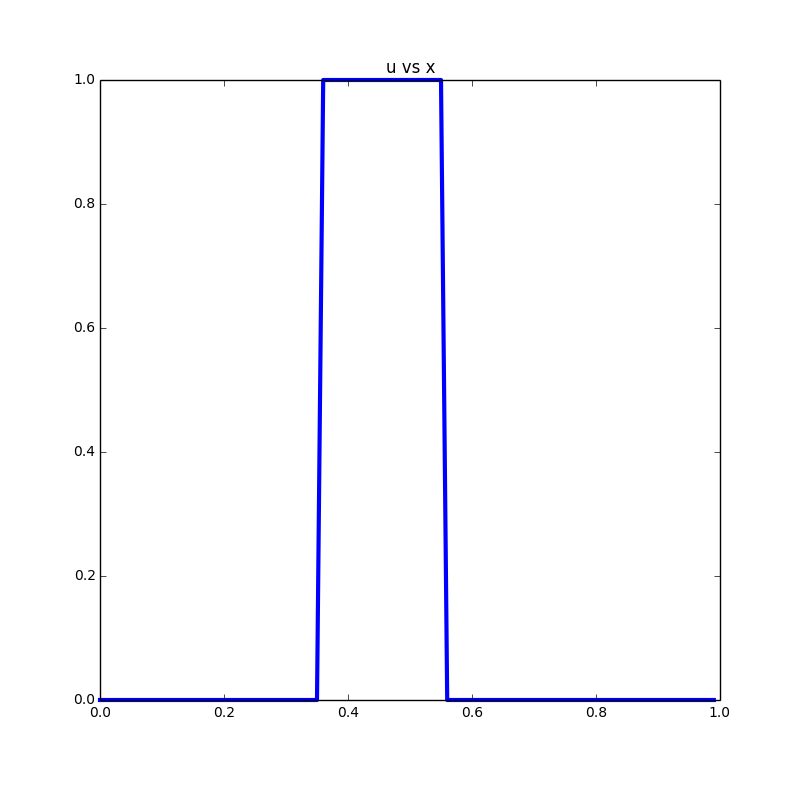
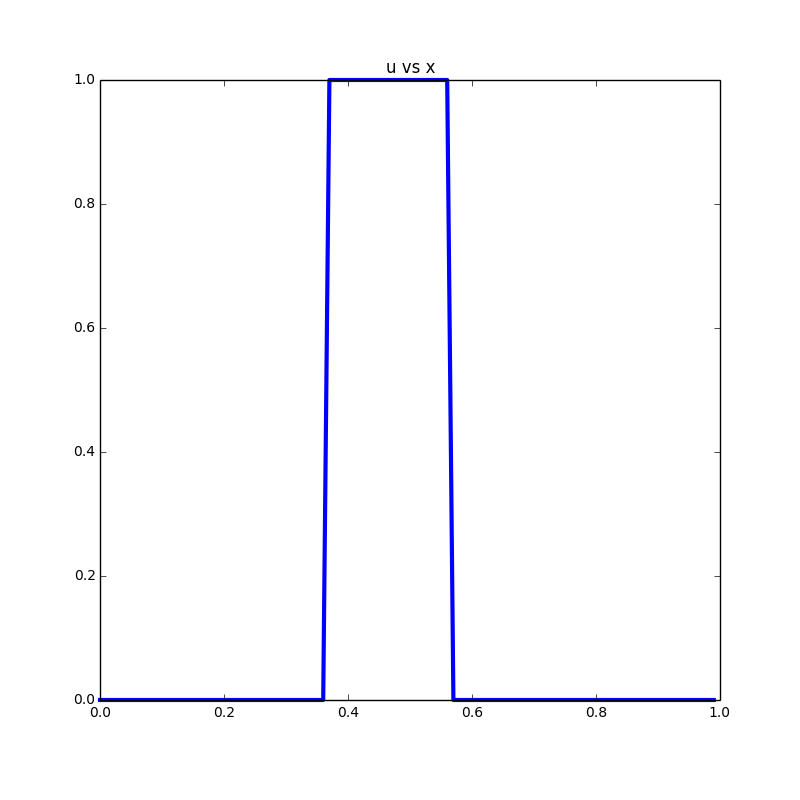
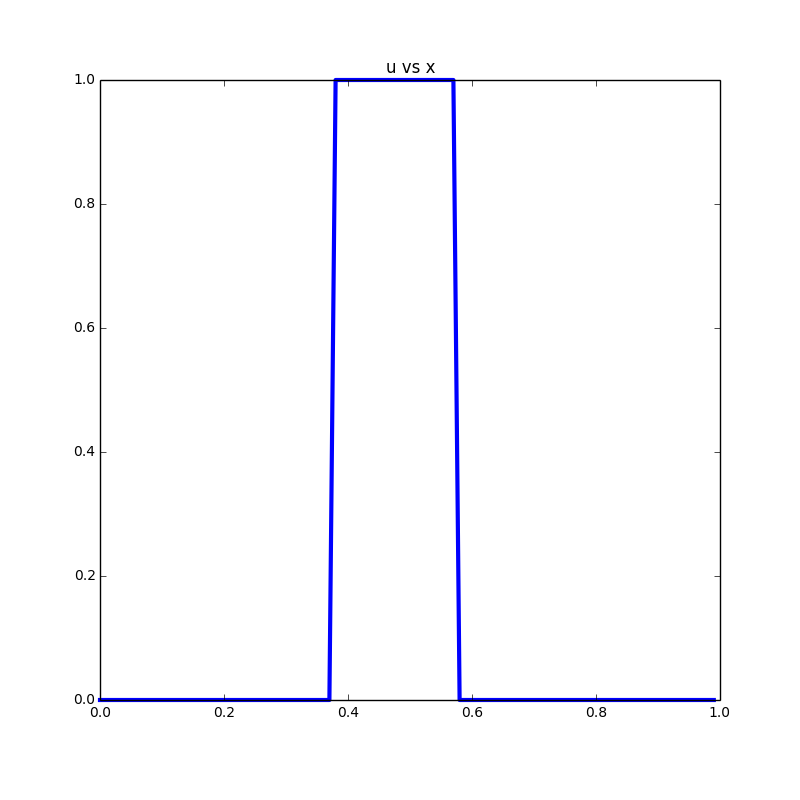
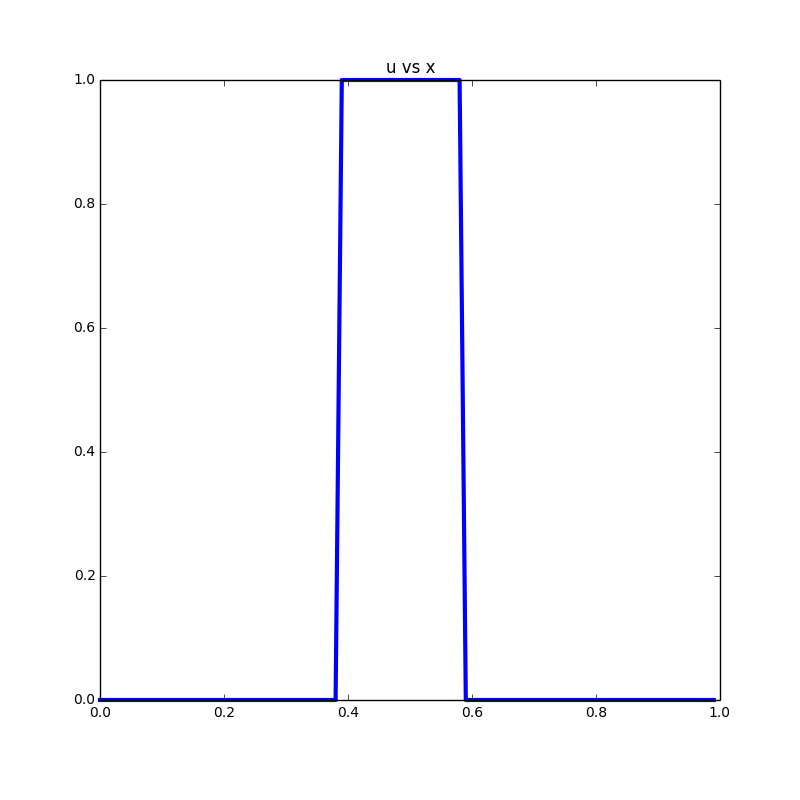
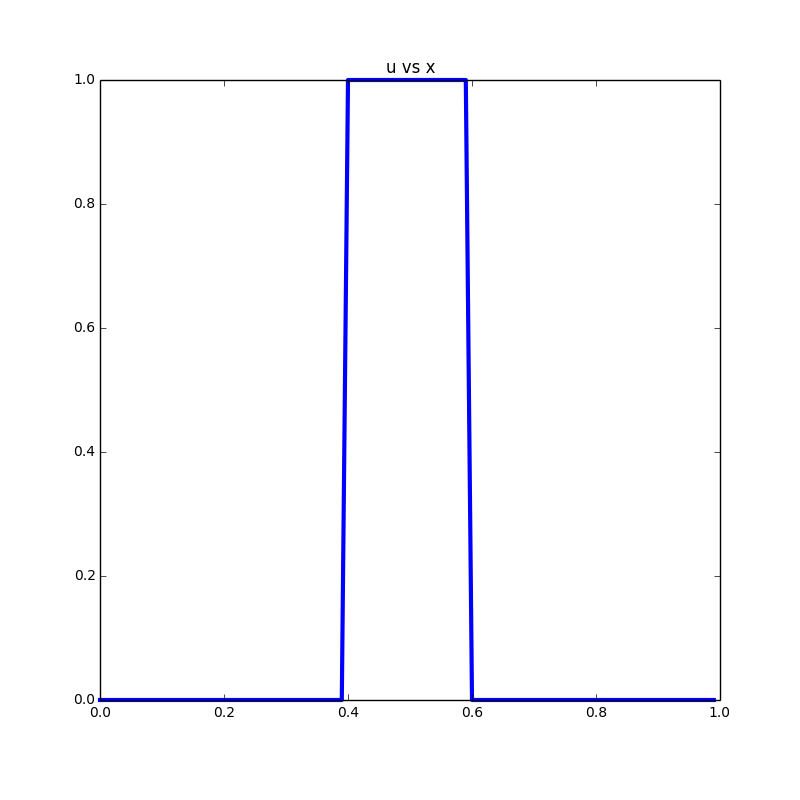

In [5]:
import time

plotit = True
u = f(x)

if plotit:
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_title('u vs x')
    line1, = ax.plot(x, u, lw=3, clip_on=False)
    def init():
        line1.set_data([], [])
        
def timestepper(n):
    uex = f((x - c * (n+1) * dt) % 1.0)
    line1.set_data(x, uex) 
    return line1

from JSAnimation import IPython_display
from matplotlib import animation
animation.FuncAnimation(fig, timestepper, init_func=init, frames=nt, interval=20, blit=True)